In [184]:
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [8]:
# Get the latest S&P 500 components symbols (list of companies' ticker symbols)
# Reference: https://www.reddit.com/r/algotrading/comments/mtgakn/free_api_to_get_up_to_date_list_of_all_sp_500/
url = 'https://www.slickcharts.com/sp500'
request = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
soup = bs(request.text, "lxml")
stats = soup.find('table',class_='table table-hover table-borderless table-sm')

df =pd.read_html(str(stats))[0]

SP500_tickers = df['Symbol']

C:\Users\KIIT\AppData\Local\Temp\ipykernel_1660\4182330746.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df =pd.read_html(str(stats))[0]


In [9]:
# Check if we got the ticker symbol correctly
print(SP500_tickers.head(), "\n")
print(SP500_tickers.describe())

0    MSFT
1    NVDA
2    AAPL
3    AMZN
4    META
Name: Symbol, dtype: object 

count      503
unique     503
top       MSFT
freq         1
Name: Symbol, dtype: object


### 3. Get the daily return data of the 500 companies from Yahoo Finance
For the 20-year period 2004-01-01 — 2024-01-01 (YYYY-MM-dd).

In [10]:
# Temporary fix: Yahoo Finance uses "BRK-B" instead of "BRK.B" and "BF-B" instead of "BF.B"
# Replace these 2 tickers in the SP500_tickers list so that we can get their data from Yahoo Finance
SP500_tickers = list(map(lambda x: x.replace('BRK.B', 'BRK-B'), SP500_tickers))
SP500_tickers = list(map(lambda x: x.replace('BF.B', 'BF-B'), SP500_tickers))

In [11]:
# This can take 3-4 minutes
start = datetime.now()
SP500_dict = {}

for ticker in SP500_tickers:
    ticker_yahoo = yf.Ticker(ticker)
    adj_close_data = ticker_yahoo.history(start="2004-01-01", end="2024-01-01", auto_adjust=False, actions=False)["Adj Close"]
    if not adj_close_data.empty:
        SP500_dict[ticker] = adj_close_data.pct_change().dropna()

print(datetime.now() - start)

GEV: Data doesn't exist for startDate = 1072933200, endDate = 1704085200
SOLV: Data doesn't exist for startDate = 1072933200, endDate = 1704085200


0:02:02.892746


In [12]:
daily_return_df = pd.DataFrame(SP500_dict)
descriptive_data = daily_return_df.describe()
descriptive_data

MSFT         NVDA         AAPL         AMZN         META  \
count  5032.000000  5032.000000  5032.000000  5032.000000  2922.000000   
mean      0.000758     0.001600     0.001487     0.001101     0.001082   
std       0.017031     0.030844     0.020802     0.024294     0.025280   
min      -0.147390    -0.352336    -0.179195    -0.218220    -0.263901   
25%      -0.007239    -0.013788    -0.008436    -0.010354    -0.010045   
50%       0.000401     0.001511     0.001137     0.000567     0.000999   
75%       0.008789     0.016473     0.012002     0.012433     0.012825   
max       0.186047     0.298067     0.139050     0.269497     0.296115   

             GOOGL         GOOG        BRK-B          LLY         AVGO  ...  \
count  4874.000000  4874.000000  5032.000000  5032.000000  3624.000000  ...   
mean      0.001011     0.001014     0.000457     0.000662     0.001505  ...   
std       0.019349     0.019367     0.013367     0.015634     0.022169  ...   
min      -0.116342    -0.116091    -0.109440    -0.123483    -0.199129  ...   
25%      -0.007991    -0.007862    -0.005608    -0.006769    -0.010267  ...   
50%       0.000769     0.000701     0.000170     0.000655     0.001441  ...   
75%       0.010137     0.010139     0.006389     0.007805     0.012932  ...   
max       0.199915     0.199915     0.192641     0.156797     0.158337  ...   

              ETSY          FMC         PAYC          IVZ          BEN  \
count  2192.000000  5032.000000  2444.000000  5032.000000  5032.000000   
mean      0.001178     0.000708     0.001520     0.000526     0.000458   
std       0.038176     0.021727     0.029803     0.026851     0.021777   
min      -0.283411    -0.208398    -0.384863    -0.211329    -0.152757   
25%      -0.018437    -0.008934    -0.012396    -0.011486    -0.009611   
50%       0.000000     0.000529     0.002680     0.000340     0.000693   
75%       0.020372     0.010347     0.015996     0.012414     0.011021   
max       0.306001     0.225434     0.192893     0.280510     0.161147   

               BIO          MHK         PARA          FOX          NWS  
count  5032.000000  5032.000000  4547.000000  1209.000000  2651.000000  
mean      0.000514     0.000369     0.000367    -0.000008     0.000407  
std       0.018676     0.024270     0.028343     0.021045     0.018604  
min      -0.167247    -0.242460    -0.283530    -0.104065    -0.145522  
25%      -0.008106    -0.010356    -0.012082    -0.010882    -0.009032  
50%       0.000415     0.000144     0.000288    -0.000632     0.000000  
75%       0.008629     0.010918     0.012249     0.010762     0.009424  
max       0.205034     0.295611     0.307624     0.132469     0.132931  

[8 rows x 501 columns]

In [136]:
# df.dropna(axis=1, inplace=True)
# df.to_csv('daily_return_df1.csv')

In [185]:
df = pd.read_csv('daily_return_df1.csv', index_col='Date')
df.head()

MSFT      NVDA      AAPL      AMZN     BRK-B  \
Date                                                                          
2004-01-05 00:00:00-05:00  0.025136  0.032496  0.041824  0.026397  0.010703   
2004-01-06 00:00:00-05:00  0.003553  0.040708 -0.003610 -0.004505  0.008825   
2004-01-07 00:00:00-05:00 -0.001062  0.008870  0.022636 -0.021309  0.005598   
2004-01-08 00:00:00-05:00 -0.001772  0.003597  0.034086 -0.031985 -0.013222   
2004-01-09 00:00:00-05:00 -0.017756  0.014337 -0.015412  0.026871  0.006700   

                                LLY       JPM       XOM       UNH        PG  \
Date                                                                          
2004-01-05 00:00:00-05:00 -0.014739 -0.001911  0.023382 -0.048103  0.004950   
2004-01-06 00:00:00-05:00 -0.000855  0.025170 -0.006734  0.010320 -0.005026   
2004-01-07 00:00:00-05:00 -0.004420  0.014679 -0.007264  0.009334 -0.008891   
2004-01-08 00:00:00-05:00 -0.024635  0.017096 -0.002439  0.002094  0.010500   
2004-01-09 00:00:00-05:00 -0.007636  0.002328 -0.014914 -0.009055  0.005145   

                           ...       BWA       HAS       FRT        RL  \
Date                       ...                                           
2004-01-05 00:00:00-05:00  ...  0.007027  0.017127  0.001297  0.009411   
2004-01-06 00:00:00-05:00  ...  0.022561  0.009822  0.003109  0.002762   
2004-01-07 00:00:00-05:00  ...  0.001592 -0.004632 -0.005682 -0.012741   
2004-01-08 00:00:00-05:00  ...  0.017372 -0.021405 -0.001298 -0.001744   
2004-01-09 00:00:00-05:00  ...  0.000558 -0.001426 -0.000781 -0.022362   

                                 GL       FMC       IVZ       BEN       BIO  \
Date                                                                          
2004-01-05 00:00:00-05:00  0.007040  0.000584  0.031081  0.016670 -0.002739   
2004-01-06 00:00:00-05:00 -0.002622  0.004960  0.003276 -0.001130 -0.002575   
2004-01-07 00:00:00-05:00 -0.001095 -0.000581 -0.003266  0.012830  0.011876   
2004-01-08 00:00:00-05:00  0.000000  0.017722  0.061599  0.007265 -0.005783   
2004-01-09 00:00:00-05:00 -0.000658 -0.026548 -0.014815 -0.006288  0.005304   

                                MHK  
Date                                 
2004-01-05 00:00:00-05:00 -0.004219  
2004-01-06 00:00:00-05:00 -0.003249  
2004-01-07 00:00:00-05:00  0.007510  
2004-01-08 00:00:00-05:00 -0.001406  
2004-01-09 00:00:00-05:00 -0.002958  

[5 rows x 385 columns]

In [186]:
df.dropna(axis=1, inplace=True)

In [187]:
df.head()

MSFT      NVDA      AAPL      AMZN     BRK-B  \
Date                                                                          
2004-01-05 00:00:00-05:00  0.025136  0.032496  0.041824  0.026397  0.010703   
2004-01-06 00:00:00-05:00  0.003553  0.040708 -0.003610 -0.004505  0.008825   
2004-01-07 00:00:00-05:00 -0.001062  0.008870  0.022636 -0.021309  0.005598   
2004-01-08 00:00:00-05:00 -0.001772  0.003597  0.034086 -0.031985 -0.013222   
2004-01-09 00:00:00-05:00 -0.017756  0.014337 -0.015412  0.026871  0.006700   

                                LLY       JPM       XOM       UNH        PG  \
Date                                                                          
2004-01-05 00:00:00-05:00 -0.014739 -0.001911  0.023382 -0.048103  0.004950   
2004-01-06 00:00:00-05:00 -0.000855  0.025170 -0.006734  0.010320 -0.005026   
2004-01-07 00:00:00-05:00 -0.004420  0.014679 -0.007264  0.009334 -0.008891   
2004-01-08 00:00:00-05:00 -0.024635  0.017096 -0.002439  0.002094  0.010500   
2004-01-09 00:00:00-05:00 -0.007636  0.002328 -0.014914 -0.009055  0.005145   

                           ...       BWA       HAS       FRT        RL  \
Date                       ...                                           
2004-01-05 00:00:00-05:00  ...  0.007027  0.017127  0.001297  0.009411   
2004-01-06 00:00:00-05:00  ...  0.022561  0.009822  0.003109  0.002762   
2004-01-07 00:00:00-05:00  ...  0.001592 -0.004632 -0.005682 -0.012741   
2004-01-08 00:00:00-05:00  ...  0.017372 -0.021405 -0.001298 -0.001744   
2004-01-09 00:00:00-05:00  ...  0.000558 -0.001426 -0.000781 -0.022362   

                                 GL       FMC       IVZ       BEN       BIO  \
Date                                                                          
2004-01-05 00:00:00-05:00  0.007040  0.000584  0.031081  0.016670 -0.002739   
2004-01-06 00:00:00-05:00 -0.002622  0.004960  0.003276 -0.001130 -0.002575   
2004-01-07 00:00:00-05:00 -0.001095 -0.000581 -0.003266  0.012830  0.011876   
2004-01-08 00:00:00-05:00  0.000000  0.017722  0.061599  0.007265 -0.005783   
2004-01-09 00:00:00-05:00 -0.000658 -0.026548 -0.014815 -0.006288  0.005304   

                                MHK  
Date                                 
2004-01-05 00:00:00-05:00 -0.004219  
2004-01-06 00:00:00-05:00 -0.003249  
2004-01-07 00:00:00-05:00  0.007510  
2004-01-08 00:00:00-05:00 -0.001406  
2004-01-09 00:00:00-05:00 -0.002958  

[5 rows x 385 columns]

### Specific Time Periods
1. Pre-Financial Crisis: 2004-01-01 to 2006-12-31
2. Financial Crisis: 2007-01-01 to 2009-06-30
3. Post-Financial Crisis: 2009-07-01 to 2019-12-31
4. COVID Period: 2020-01-01 to 2022-12-31

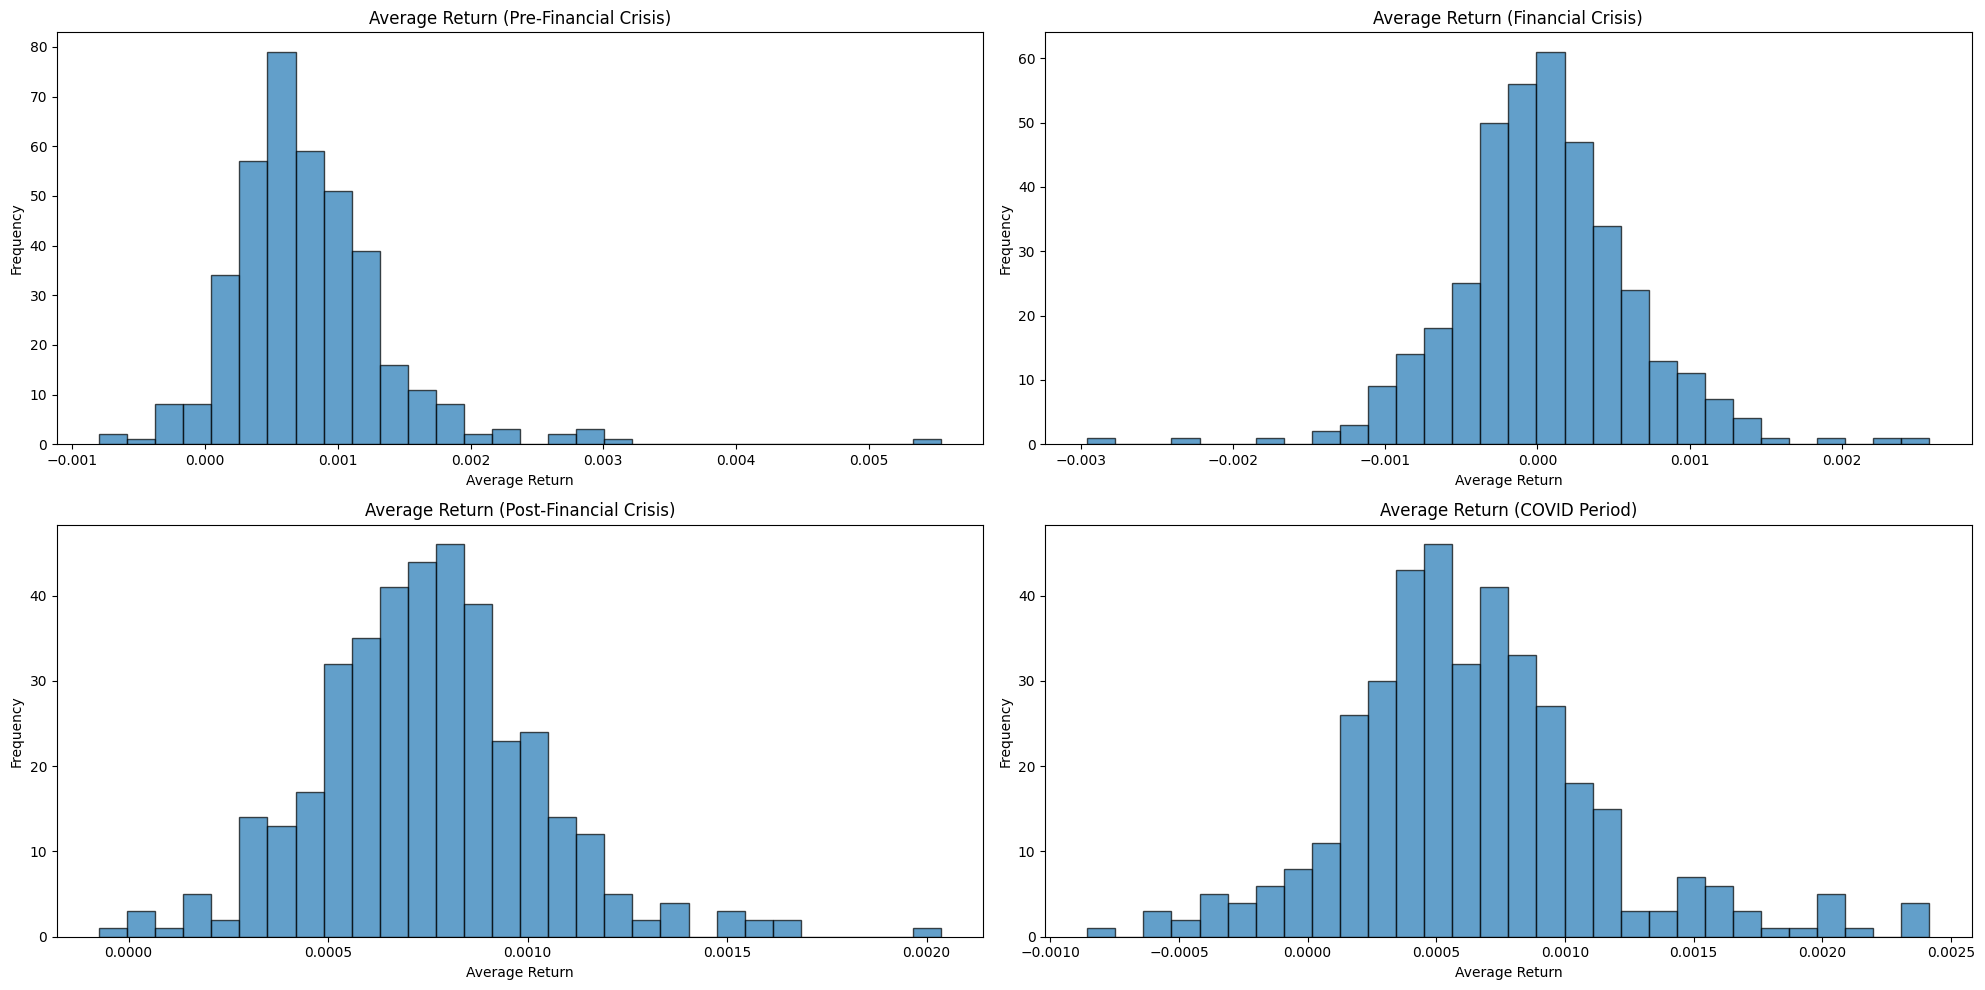

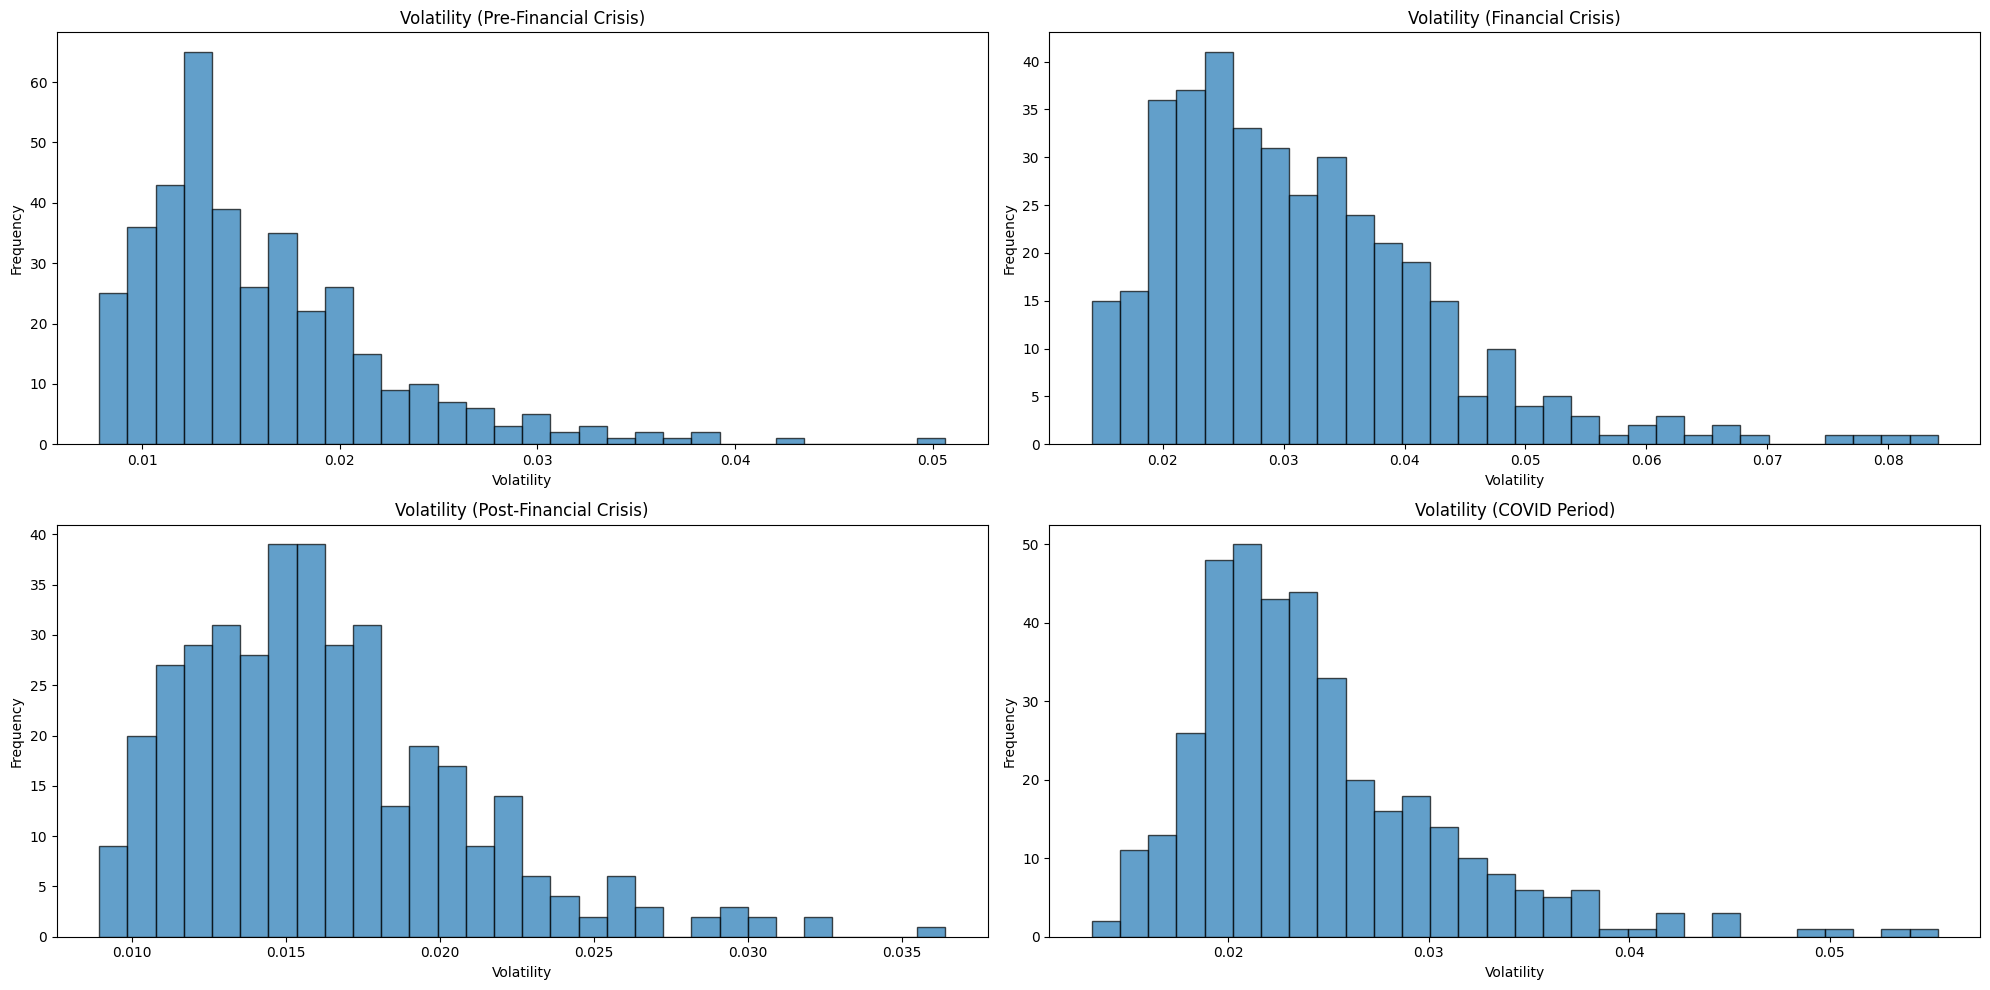

In [188]:
pre_financial_crisis = df.loc['2004-01-01':'2006-12-31']
financial_crisis = df.loc['2007-01-01':'2009-06-30']
post_financial_crisis = df.loc['2009-07-01':'2019-12-31']
covid_period = df.loc['2020-01-01':'2022-12-31']

# Calculate average returns and volatilities for each period
avg_return_pre_crisis = pre_financial_crisis.mean()
volatility_pre_crisis = pre_financial_crisis.std()

avg_return_crisis = financial_crisis.mean()
volatility_crisis = financial_crisis.std()

avg_return_post_crisis = post_financial_crisis.mean()
volatility_post_crisis = post_financial_crisis.std()

avg_return_covid = covid_period.mean()
volatility_covid = covid_period.std()

# Visualize the distributions of average returns
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.hist(avg_return_pre_crisis, bins=30, edgecolor='k', alpha=0.7)
plt.title('Average Return (Pre-Financial Crisis)')
plt.xlabel('Average Return')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(avg_return_crisis, bins=30, edgecolor='k', alpha=0.7)
plt.title('Average Return (Financial Crisis)')
plt.xlabel('Average Return')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(avg_return_post_crisis, bins=30, edgecolor='k', alpha=0.7)
plt.title('Average Return (Post-Financial Crisis)')
plt.xlabel('Average Return')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(avg_return_covid, bins=30, edgecolor='k', alpha=0.7)
plt.title('Average Return (COVID Period)')
plt.xlabel('Average Return')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualize the distributions of volatilities
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.hist(volatility_pre_crisis, bins=30, edgecolor='k', alpha=0.7)
plt.title('Volatility (Pre-Financial Crisis)')
plt.xlabel('Volatility')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(volatility_crisis, bins=30, edgecolor='k', alpha=0.7)
plt.title('Volatility (Financial Crisis)')
plt.xlabel('Volatility')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(volatility_post_crisis, bins=30, edgecolor='k', alpha=0.7)
plt.title('Volatility (Post-Financial Crisis)')
plt.xlabel('Volatility')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(volatility_covid, bins=30, edgecolor='k', alpha=0.7)
plt.title('Volatility (COVID Period)')
plt.xlabel('Volatility')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
tickers = df.columns.tolist()

# Function to get GICS sector and industry
def get_gics_data(ticker):
    try:
        stock = yf.Ticker(ticker)
        sector = stock.info.get('sector', 'Unknown')
        industry = stock.info.get('industry', 'Unknown')
        return sector, industry
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return 'Unknown', 'Unknown'

# Fetch GICS data for each ticker
gics_data = []
for ticker in tickers:
    sector, industry = get_gics_data(ticker)
    gics_data.append({'Company': ticker, 'GICS Sector': sector, 'GICS Industry': industry})

# Convert to DataFrame
gics_df = pd.DataFrame(gics_data)

# Display the GICS DataFrame
print(gics_df)

    Company         GICS Sector                       GICS Industry
0      MSFT          Technology           Software - Infrastructure
1      NVDA          Technology                      Semiconductors
2      AAPL          Technology                Consumer Electronics
3      AMZN   Consumer Cyclical                     Internet Retail
4     BRK-B  Financial Services             Insurance - Diversified
..      ...                 ...                                 ...
380     FMC     Basic Materials                 Agricultural Inputs
381     IVZ  Financial Services                    Asset Management
382     BEN  Financial Services                    Asset Management
383     BIO          Healthcare                     Medical Devices
384     MHK   Consumer Cyclical  Furnishings, Fixtures & Appliances

[385 rows x 3 columns]


In [72]:
gics_df

Company         GICS Sector                       GICS Industry
0      MSFT          Technology           Software - Infrastructure
1      NVDA          Technology                      Semiconductors
2      AAPL          Technology                Consumer Electronics
3      AMZN   Consumer Cyclical                     Internet Retail
4     BRK-B  Financial Services             Insurance - Diversified
..      ...                 ...                                 ...
380     FMC     Basic Materials                 Agricultural Inputs
381     IVZ  Financial Services                    Asset Management
382     BEN  Financial Services                    Asset Management
383     BIO          Healthcare                     Medical Devices
384     MHK   Consumer Cyclical  Furnishings, Fixtures & Appliances

[385 rows x 3 columns]

In [189]:
gics_df['GICS Sector'].value_counts()

GICS Sector
Industrials               57
Healthcare                54
Technology                52
Financial Services        52
Consumer Cyclical         41
Consumer Defensive        31
Utilities                 28
Real Estate               26
Energy                    17
Basic Materials           17
Communication Services    10
Name: count, dtype: int64

In [190]:
# gics_df.to_csv('gics_df.csv', index=False)

In [288]:
feature_matrix = pd.DataFrame({
    'avg_return_pre_crisis': avg_return_pre_crisis,
    'volatility_pre_crisis': volatility_pre_crisis,
    'avg_return_crisis': avg_return_crisis,
    'volatility_crisis': volatility_crisis,
    'avg_return_post_crisis': avg_return_post_crisis,
    'volatility_post_crisis': volatility_post_crisis,
    'avg_return_covid': avg_return_covid,
    'volatility_covid': volatility_covid
}).dropna()

# Reset the index to make company names a column
feature_matrix.reset_index(inplace=True)
feature_matrix.rename(columns={'index': 'Company'}, inplace=True)

# Merge the feature matrix with GICS data on the 'Company' column
merged_data = pd.merge(feature_matrix, gics_df, on='Company')

In [289]:
merged_data

Company  avg_return_pre_crisis  volatility_pre_crisis  avg_return_crisis  \
0      MSFT               0.000356               0.011085           0.000020   
1      NVDA               0.002036               0.030606          -0.000298   
2      AAPL               0.003060               0.024775           0.001281   
3      AMZN              -0.000049               0.024757           0.001856   
4     BRK-B               0.000391               0.008356          -0.000154   
..      ...                    ...                    ...                ...   
380     FMC               0.001229               0.017300           0.001038   
381     IVZ               0.000968               0.020328           0.000629   
382     BEN               0.001143               0.013500           0.000047   
383     BIO               0.000594               0.016480           0.000204   
384     MHK               0.000156               0.013320          -0.000582   

     volatility_crisis  avg_return_post_crisis  volatility_post_crisis  \
0             0.025123                0.000914                0.014376   
1             0.042996                0.001507                0.025704   
2             0.030126                0.001194                0.016205   
3             0.036857                0.001374                0.020287   
4             0.021217                0.000582                0.011497   
..                 ...                     ...                     ...   
380           0.036377                0.000786                0.017045   
381           0.046098                0.000326                0.019494   
382           0.037173                0.000296                0.016721   
383           0.026377                0.000711                0.014943   
384           0.034996                0.000708                0.019907   

     avg_return_covid  volatility_covid         GICS Sector  \
0            0.000832          0.021890          Technology   
1            0.001829          0.035245          Technology   
2            0.001053          0.023264          Technology   
3            0.000177          0.024624   Consumer Cyclical   
4            0.000540          0.016116  Financial Services   
..                ...               ...                 ...   
380          0.000653          0.023740     Basic Materials   
381          0.000755          0.034101  Financial Services   
382          0.000573          0.027371  Financial Services   
383          0.000435          0.023064          Healthcare   
384          0.000207          0.034201   Consumer Cyclical   

                          GICS Industry  
0             Software - Infrastructure  
1                        Semiconductors  
2                  Consumer Electronics  
3                       Internet Retail  
4               Insurance - Diversified  
..                                  ...  
380                 Agricultural Inputs  
381                    Asset Management  
382                    Asset Management  
383                     Medical Devices  
384  Furnishings, Fixtures & Appliances  

[385 rows x 11 columns]

In [290]:
feature_matrix

Company  avg_return_pre_crisis  volatility_pre_crisis  avg_return_crisis  \
0      MSFT               0.000356               0.011085           0.000020   
1      NVDA               0.002036               0.030606          -0.000298   
2      AAPL               0.003060               0.024775           0.001281   
3      AMZN              -0.000049               0.024757           0.001856   
4     BRK-B               0.000391               0.008356          -0.000154   
..      ...                    ...                    ...                ...   
380     FMC               0.001229               0.017300           0.001038   
381     IVZ               0.000968               0.020328           0.000629   
382     BEN               0.001143               0.013500           0.000047   
383     BIO               0.000594               0.016480           0.000204   
384     MHK               0.000156               0.013320          -0.000582   

     volatility_crisis  avg_return_post_crisis  volatility_post_crisis  \
0             0.025123                0.000914                0.014376   
1             0.042996                0.001507                0.025704   
2             0.030126                0.001194                0.016205   
3             0.036857                0.001374                0.020287   
4             0.021217                0.000582                0.011497   
..                 ...                     ...                     ...   
380           0.036377                0.000786                0.017045   
381           0.046098                0.000326                0.019494   
382           0.037173                0.000296                0.016721   
383           0.026377                0.000711                0.014943   
384           0.034996                0.000708                0.019907   

     avg_return_covid  volatility_covid  
0            0.000832          0.021890  
1            0.001829          0.035245  
2            0.001053          0.023264  
3            0.000177          0.024624  
4            0.000540          0.016116  
..                ...               ...  
380          0.000653          0.023740  
381          0.000755          0.034101  
382          0.000573          0.027371  
383          0.000435          0.023064  
384          0.000207          0.034201  

[385 rows x 9 columns]

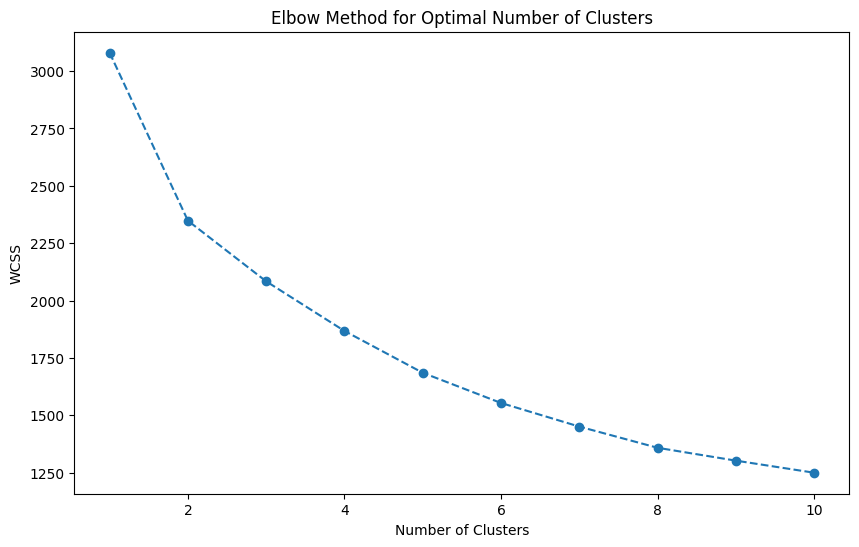

In [291]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Standardize the feature matrix
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_data.drop(columns=['Company', 'GICS Sector', 'GICS Industry']))

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [292]:
# Apply K-means clustering with the optimal number of clusters (assuming 4 from earlier)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the merged data
merged_data['Cluster'] = clusters

In [294]:
sector_distribution = merged_data.groupby(['Cluster', 'GICS Sector']).size().unstack(fill_value=0)

In [296]:
sector_distribution

GICS Sector  Basic Materials  Communication Services  Consumer Cyclical  \
Cluster                                                                   
0                          4                       3                 18   
1                          0                       2                  5   
2                          8                       5                 16   
3                          5                       0                  2   

GICS Sector  Consumer Defensive  Energy  Financial Services  Healthcare  \
Cluster                                                                   
0                             0       1                  29           2   
1                             1       2                   2          10   
2                            30       2                  20          42   
3                             0      12                   1           0   

GICS Sector  Industrials  Real Estate  Technology  Utilities  
Cluster                                                       
0                      9           15          10          2  
1                      5            3          19          0  
2                     42            8          22         25  
3                      1            0           1          1

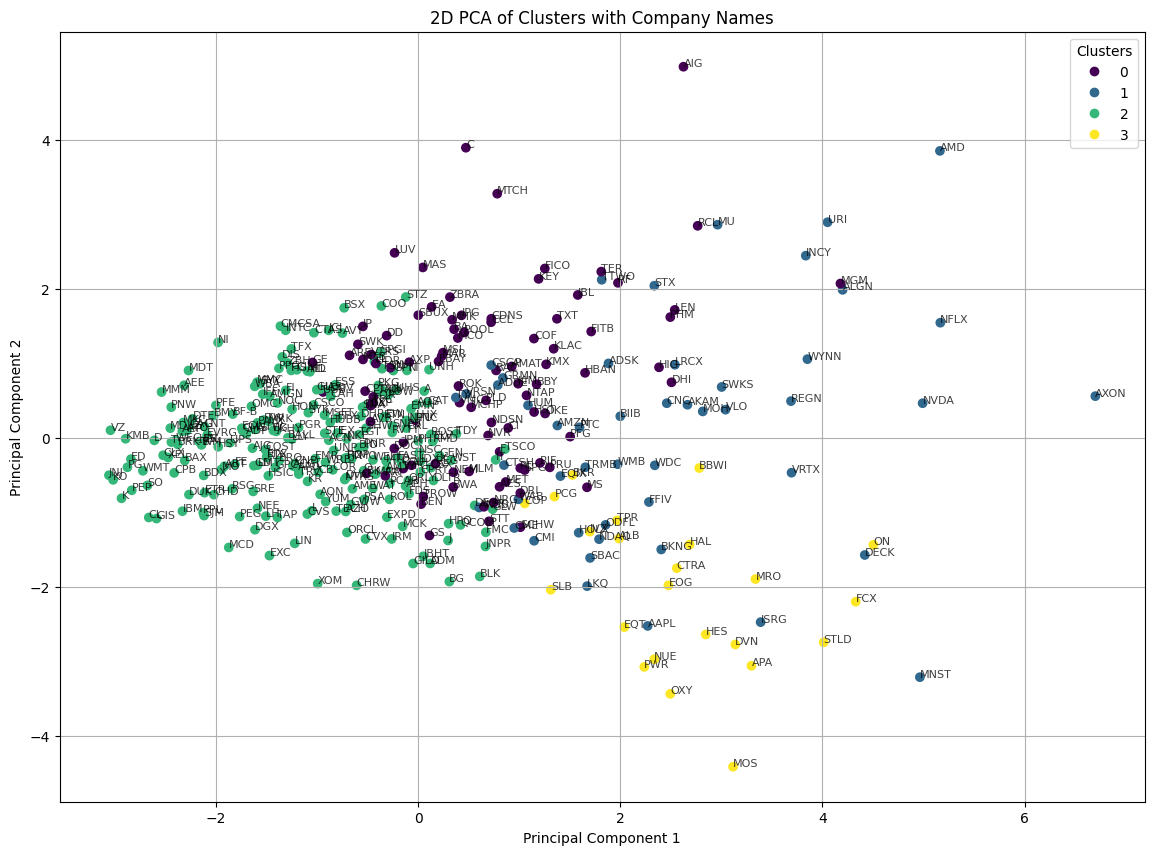

In [297]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca_2d = PCA(n_components=2)
components_2d = pca_2d.fit_transform(scaled_features)

# Create 2D plot with annotations
plt.figure(figsize=(14, 10))
scatter = plt.scatter(components_2d[:, 0], components_2d[:, 1], c=clusters, cmap='viridis')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('2D PCA of Clusters with Company Names')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

for i, txt in enumerate(merged_data['Company']):
    plt.annotate(txt, (components_2d[i, 0], components_2d[i, 1]), fontsize=8, alpha=0.75)

plt.show()

In [298]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.23


Values closer to 0 indicate overlapping clusters

In [299]:
sector_percentage = sector_distribution.div(sector_distribution.sum(axis=1), axis=0) * 100

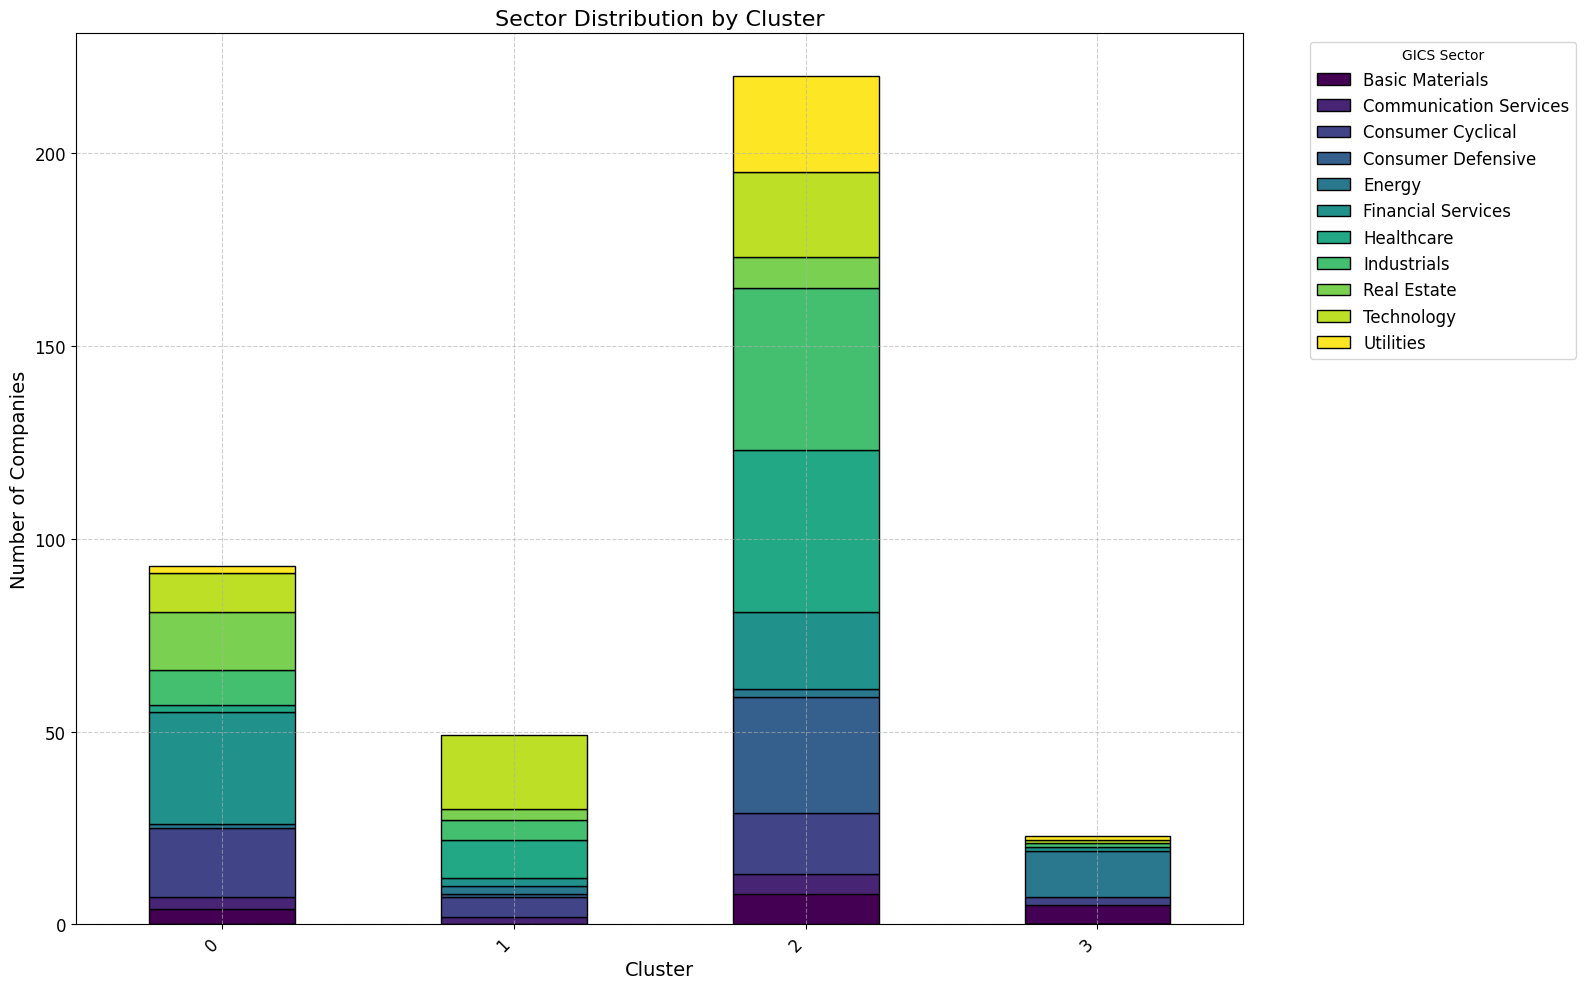

In [300]:
sector_distribution.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='viridis', edgecolor='black')
plt.title('Sector Distribution by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.legend(title='GICS Sector', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

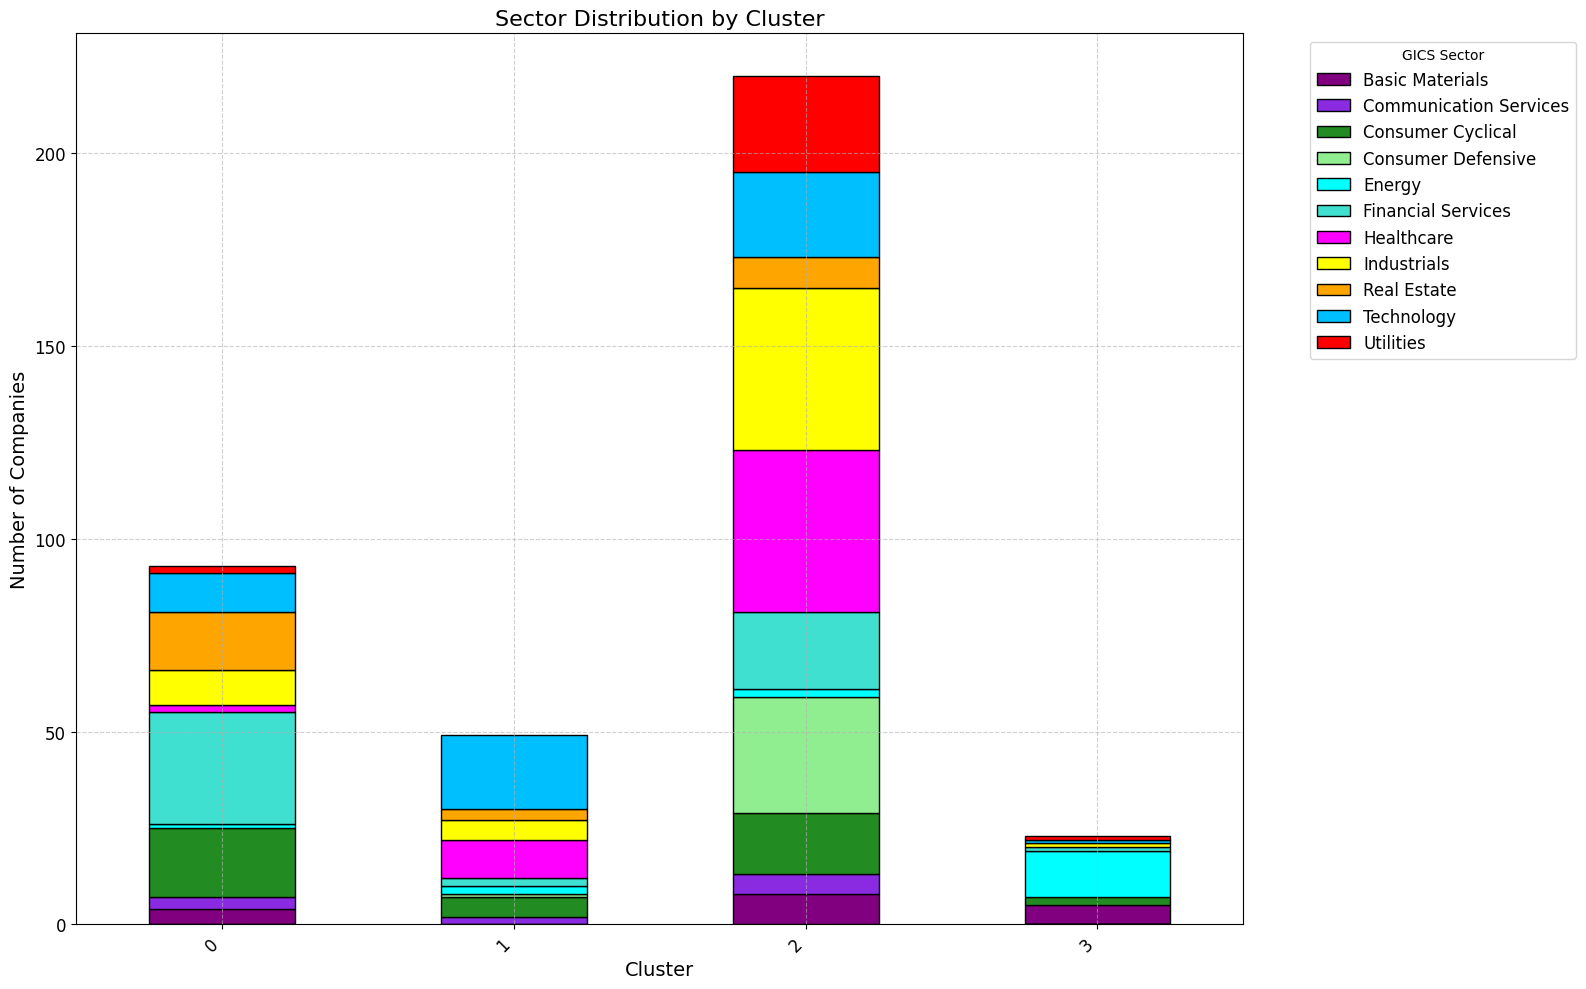

In [301]:
colormap = {
    'Basic Materials': 'purple',
    'Communication Services': 'blueviolet',
    'Consumer Cyclical': 'forestgreen',
    'Consumer Defensive': 'lightgreen',
    'Energy': 'cyan',
    'Financial Services': 'turquoise',
    'Healthcare': 'magenta',
    'Industrials': 'yellow',
    'Real Estate': 'orange',
    'Technology': 'deepskyblue',
    'Utilities': 'red'
}

colors = [colormap[sector] for sector in sector_distribution.columns]

sector_distribution.plot(kind='bar', stacked=True, figsize=(16, 10), color=colors, edgecolor='black')
plt.title('Sector Distribution by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.legend(title='GICS Sector', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

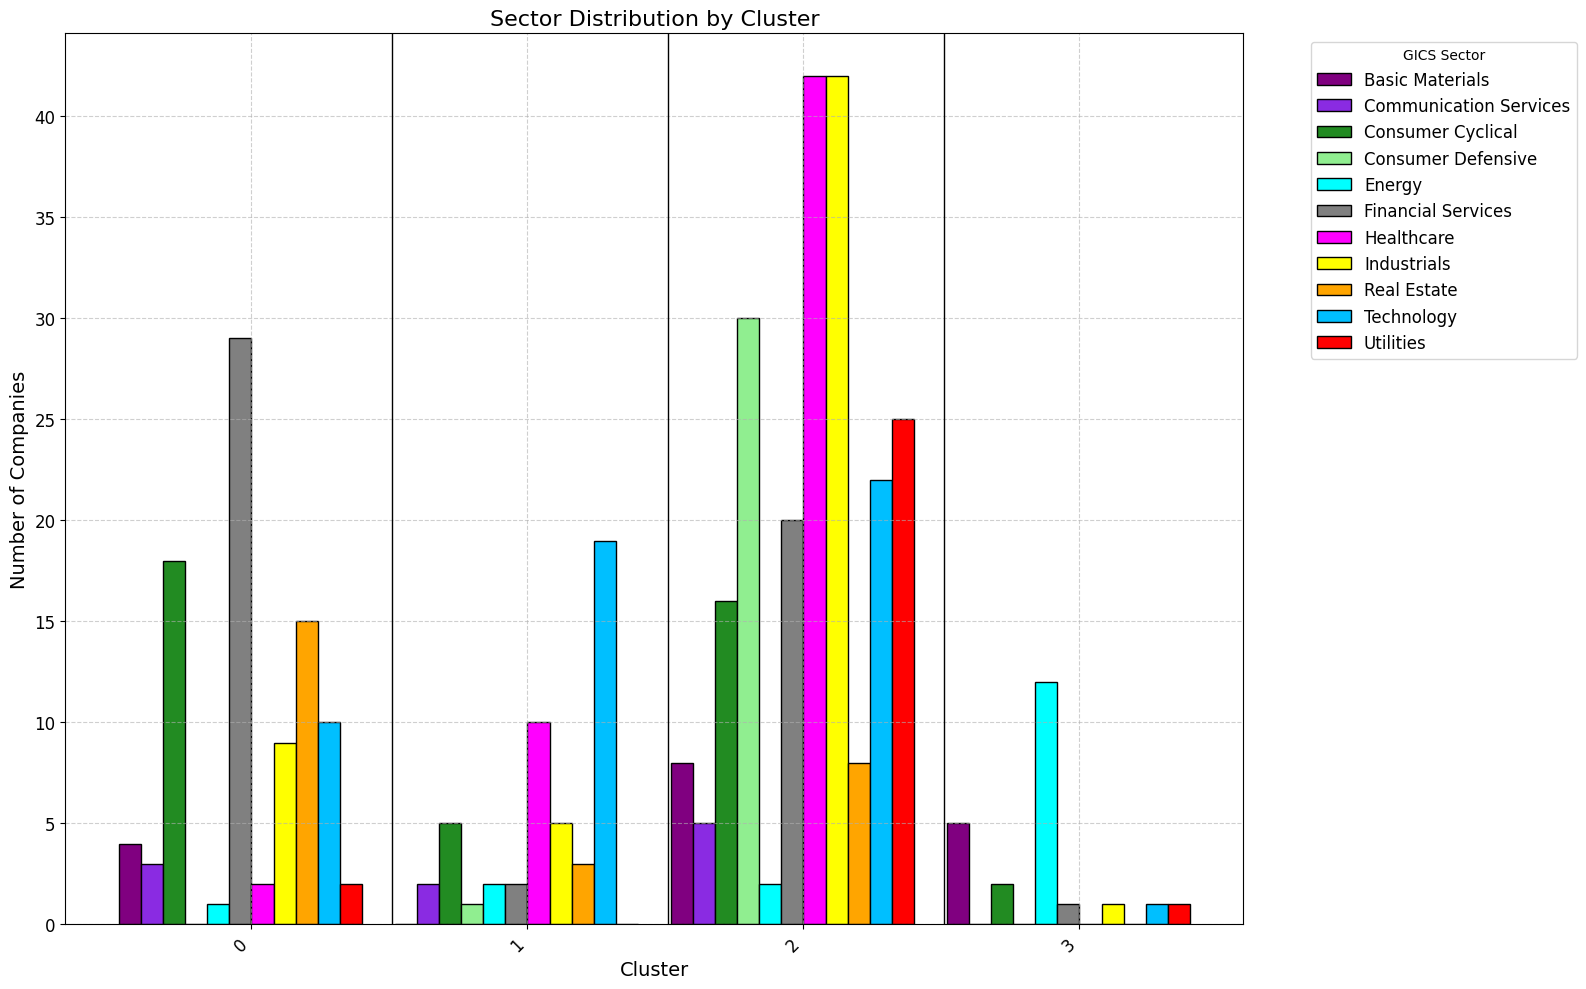

In [302]:
import matplotlib.pyplot as plt
import numpy as np

colormap = {
    'Basic Materials': 'purple',
    'Communication Services': 'blueviolet',
    'Consumer Cyclical': 'forestgreen',
    'Consumer Defensive': 'lightgreen',
    'Energy': 'cyan',
    'Financial Services': 'grey',
    'Healthcare': 'magenta',
    'Industrials': 'yellow',
    'Real Estate': 'orange',
    'Technology': 'deepskyblue',
    'Utilities': 'red'
}

colors = [colormap[sector] for sector in sector_distribution.columns]

fig, ax = plt.subplots(figsize=(16, 10))
bar_width = 0.08
indices = np.arange(len(sector_distribution.index))

for i, (sector, color) in enumerate(colormap.items()):
    bar_positions = indices + (i * bar_width)
    ax.bar(bar_positions, sector_distribution[sector], width=bar_width, label=sector, color=color, edgecolor='black')

ax.set_title('Sector Distribution by Cluster', fontsize=16)
ax.set_xlabel('Cluster', fontsize=14)
ax.set_ylabel('Number of Companies', fontsize=14)
ax.set_xticks(indices + bar_width * (len(colormap) / 2))
ax.set_xticklabels(sector_distribution.index, fontsize=12, rotation=45, ha='right')
ax.legend(title='GICS Sector', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
for i in range(1,4):
    plt.axvline(x=i-0.05, color='black', linestyle='-', linewidth=1)
plt.tight_layout()
plt.show()

### Sector Proportions within clusters

In [303]:
# proportion of each sector within each cluster
sector_proportions = merged_data.groupby(['Cluster', 'GICS Sector']).size().unstack(fill_value=0)
sector_proportions = sector_proportions.div(sector_proportions.sum(axis=1), axis=0)
sector_proportions

GICS Sector  Basic Materials  Communication Services  Consumer Cyclical  \
Cluster                                                                   
0                   0.043011                0.032258           0.193548   
1                   0.000000                0.040816           0.102041   
2                   0.036364                0.022727           0.072727   
3                   0.217391                0.000000           0.086957   

GICS Sector  Consumer Defensive    Energy  Financial Services  Healthcare  \
Cluster                                                                     
0                      0.000000  0.010753            0.311828    0.021505   
1                      0.020408  0.040816            0.040816    0.204082   
2                      0.136364  0.009091            0.090909    0.190909   
3                      0.000000  0.521739            0.043478    0.000000   

GICS Sector  Industrials  Real Estate  Technology  Utilities  
Cluster                                                       
0               0.096774     0.161290    0.107527   0.021505  
1               0.102041     0.061224    0.387755   0.000000  
2               0.190909     0.036364    0.100000   0.113636  
3               0.043478     0.000000    0.043478   0.043478

1. Cluster 0 is more diverse with high concentrations from Technology(34.2%), Healthcare(23.7%) and consumer cyclical(13%)
2. Cluster 1 is again diverse with Finance(25.6%) followed by {Industrials, Real Estate, Technology}(14%) and Consumer Cyclical(14.8%).
3. Cluster 2 is again diverse
4. Cluster 3 has a high proportion of Energy companies(50%) and Basic Materials(20.8%).

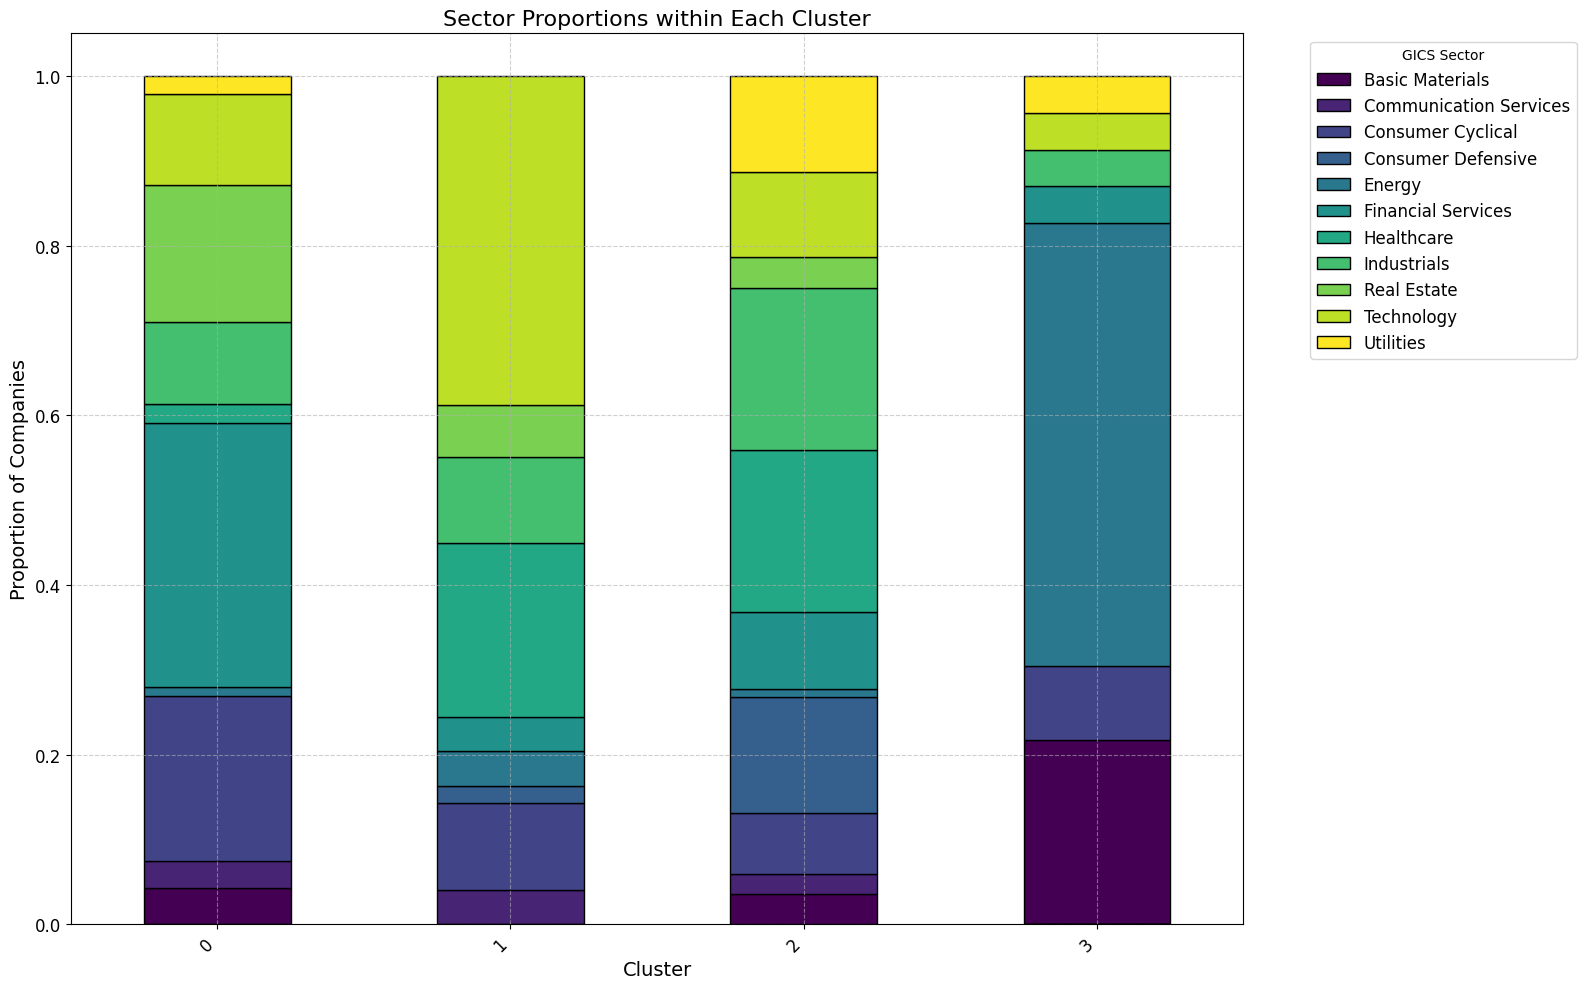

In [304]:
sector_proportions.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='viridis', edgecolor='black')
plt.title('Sector Proportions within Each Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Proportion of Companies', fontsize=14)
plt.legend(title='GICS Sector', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Sector dispersion across clusters

In [305]:
sector_dispersion = merged_data.groupby(['GICS Sector', 'Cluster']).size().unstack(fill_value=0)
sector_dispersion = sector_dispersion.div(sector_dispersion.sum(axis=1), axis=0)
sector_dispersion

Cluster                        0         1         2         3
GICS Sector                                                   
Basic Materials         0.235294  0.000000  0.470588  0.294118
Communication Services  0.300000  0.200000  0.500000  0.000000
Consumer Cyclical       0.439024  0.121951  0.390244  0.048780
Consumer Defensive      0.000000  0.032258  0.967742  0.000000
Energy                  0.058824  0.117647  0.117647  0.705882
Financial Services      0.557692  0.038462  0.384615  0.019231
Healthcare              0.037037  0.185185  0.777778  0.000000
Industrials             0.157895  0.087719  0.736842  0.017544
Real Estate             0.576923  0.115385  0.307692  0.000000
Technology              0.192308  0.365385  0.423077  0.019231
Utilities               0.071429  0.000000  0.892857  0.035714

1. Consumer Defensive(96.8%), Healthcare(77.77%), Industrials(73.7%) and Utilities(89.3%) have a higher presence in cluster 2.
2. Cluster 0- Financial Services(55.6%) and Real Estate(57.7%)
3. Energy is heavily concentrated in cluster 3(70.5%)

#### The clustering looks good for Utilities, Real Estate, Healthcare, Industrials, Consumer Defensive and Energy.

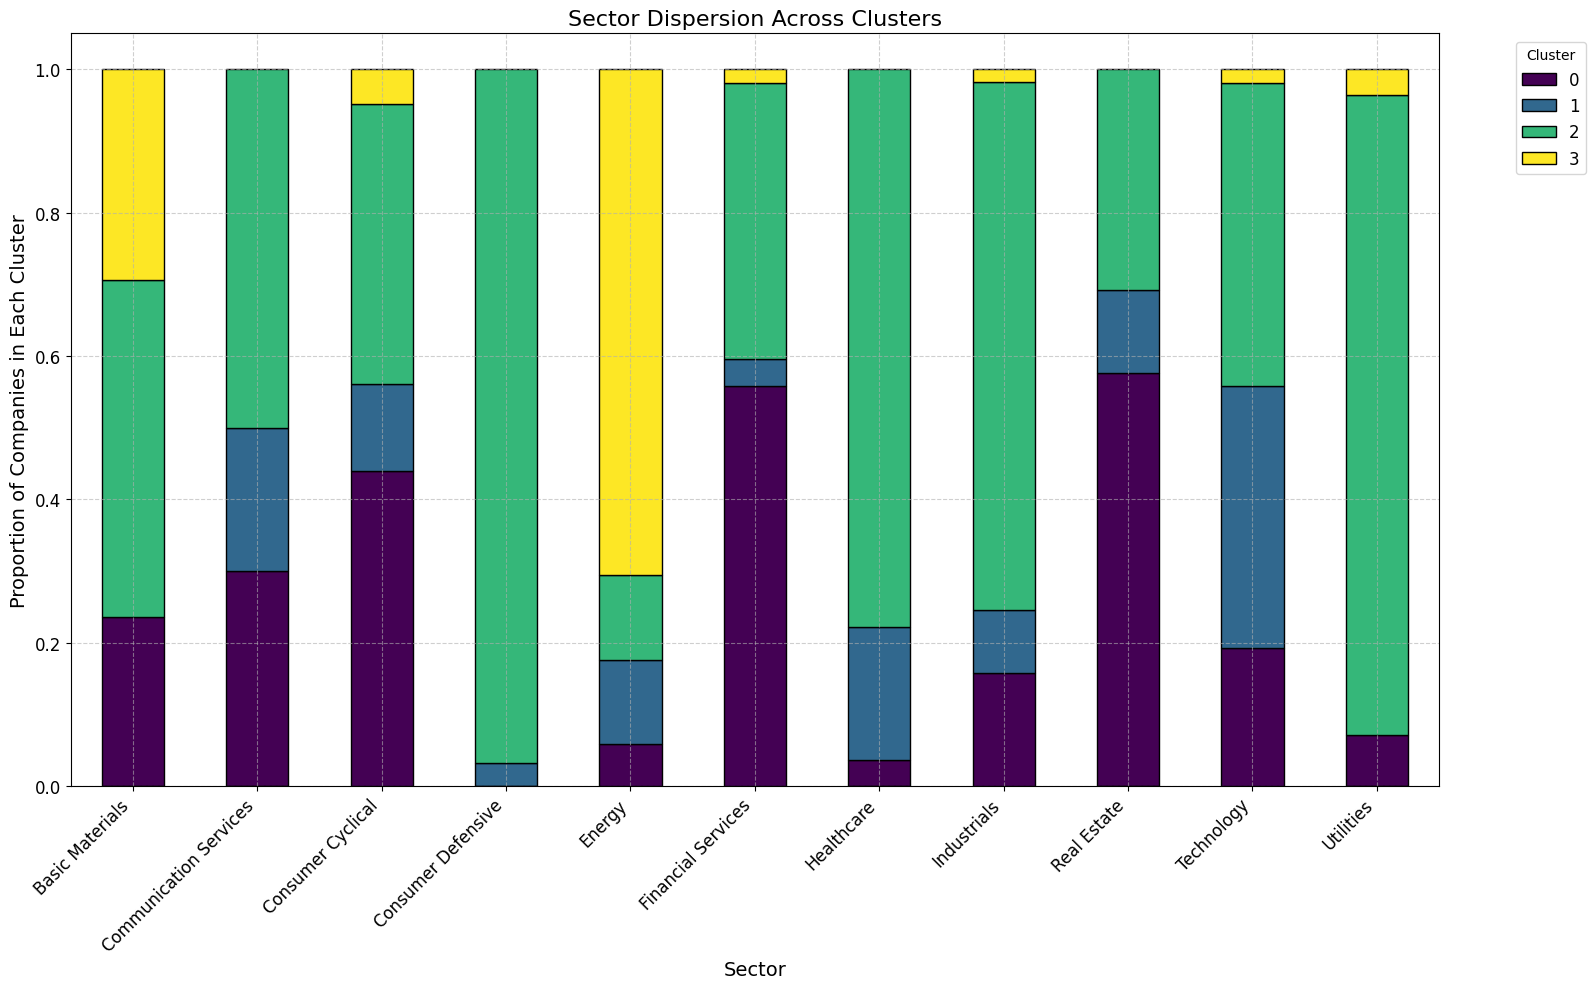

In [306]:
sector_dispersion.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='viridis', edgecolor='black')
plt.title('Sector Dispersion Across Clusters', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Proportion of Companies in Each Cluster', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Dominant sector within each cluster

In [307]:
# Identify the dominant sector within each cluster
dominant_sectors = sector_proportions.idxmax(axis=1)
dominant_proportions = sector_proportions.max(axis=1)
dominant_sector_df = pd.DataFrame({
    'Dominant Sector': dominant_sectors,
    'Proportion': dominant_proportions
})
dominant_sector_df

Dominant Sector  Proportion
Cluster                                
0        Financial Services    0.311828
1                Technology    0.387755
2                Healthcare    0.190909
3                    Energy    0.521739

### Companies from the same sector that are found in different clusters

In [308]:
# Identify companies from the same sector that are found in different clusters
sector_cluster_counts = merged_data.groupby(['GICS Sector', 'Cluster'])['Company'].count().unstack(fill_value=0)
sector_multiple_clusters = sector_cluster_counts[sector_cluster_counts.gt(0).sum(axis=1) > 1]
companies_in_multiple_clusters = merged_data[merged_data['GICS Sector'].isin(sector_multiple_clusters.index)]
sector_cluster_companies = companies_in_multiple_clusters.groupby(['GICS Sector', 'Cluster'])['Company'].apply(list).unstack(fill_value=0)
sector_cluster_companies

Cluster                                                                 0  \
GICS Sector                                                                 
Basic Materials                                       [NEM, DD, MLM, VMC]   
Communication Services                                    [EA, IPG, MTCH]   
Consumer Cyclical       [SBUX, MAR, F, DHI, RCL, LEN, EBAY, NVR, PHM, ...   
Consumer Defensive                                                      0   
Energy                                                              [OKE]   
Financial Services      [JPM, BAC, WFC, GS, AXP, MS, C, SCHW, MCO, USB...   
Healthcare                                                     [CI, VTRS]   
Industrials                 [GE, BA, ROK, LUV, TXT, MAS, SWK, NDSN, POOL]   
Real Estate             [PLD, SPG, AVB, EQR, WY, VTR, ARE, DOC, HST, K...   
Technology              [AMAT, KLAC, CDNS, MSI, MCHP, FICO, NTAP, TER,...   
Utilities                                                      [NRG, AES]   

Cluster                                                                 1  \
GICS Sector                                                                 
Basic Materials                                                         0   
Communication Services                                       [NFLX, TTWO]   
Consumer Cyclical                           [AMZN, BKNG, DECK, LKQ, WYNN]   
Consumer Defensive                                                 [MNST]   
Energy                                                         [WMB, VLO]   
Financial Services                                            [CME, NDAQ]   
Healthcare              [ISRG, VRTX, REGN, HUM, CNC, BIIB, MOH, HOLX, ...   
Industrials                                   [URI, CMI, ODFL, WAB, AXON]   
Real Estate                                            [EQIX, CSGP, SBAC]   
Technology              [NVDA, AAPL, AMD, ADBE, MU, LRCX, ADSK, CTSH, ...   
Utilities                                                               0   

Cluster                                                                 2  \
GICS Sector                                                                 
Basic Materials                  [LIN, SHW, ECL, APD, PPG, IFF, EMN, FMC]   
Communication Services                           [DIS, VZ, CMCSA, T, OMC]   
Consumer Cyclical       [HD, MCD, TJX, LOW, NKE, ORLY, AZO, ROST, YUM,...   
Consumer Defensive      [PG, COST, WMT, KO, PEP, MDLZ, CL, MO, TGT, KM...   
Energy                                                         [XOM, CVX]   
Financial Services      [BRK-B, SPGI, PGR, BLK, CB, MMC, AON, AJG, TRV...   
Healthcare              [LLY, UNH, JNJ, MRK, TMO, ABT, AMGN, DHR, PFE,...   
Industrials             [CAT, HON, UNP, RTX, ETN, ADP, LMT, UPS, DE, W...   
Real Estate                       [AMT, WELL, O, PSA, CCI, IRM, ESS, MAA]   
Technology              [MSFT, QCOM, ORCL, ACN, CSCO, INTU, TXN, IBM, ...   
Utilities               [NEE, SO, DUK, SRE, AEP, D, PEG, EXC, ED, XEL,...   

Cluster                                                                 3  
GICS Sector                                                                
Basic Materials                                [FCX, NUE, STLD, ALB, MOS]  
Communication Services                                                  0  
Consumer Cyclical                                             [TPR, BBWI]  
Consumer Defensive                                                      0  
Energy                  [COP, EOG, SLB, OXY, HES, BKR, HAL, DVN, CTRA,...  
Financial Services                                                  [IVZ]  
Healthcare                                                              0  
Industrials                                                         [PWR]  
Real Estate                                                             0  
Technology                                                           [ON]  
Utilities                                                           [PCG]

1. This spread of companies from the same sector across different clusters highlight how companies with similar core operations might still differ in terms of growth, risk and market behavior.
2. Technology Sector:- Microsoft, oracle, IBM, Qualcomm in cluster 1; NVIDIA, Apple, AMD in cluster 3; 
3. Amazon(2) in Consumer cyclical

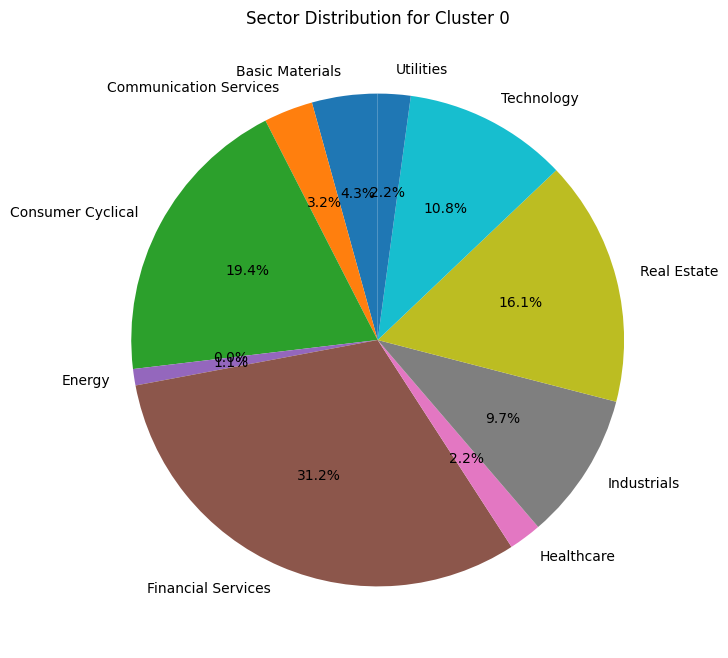

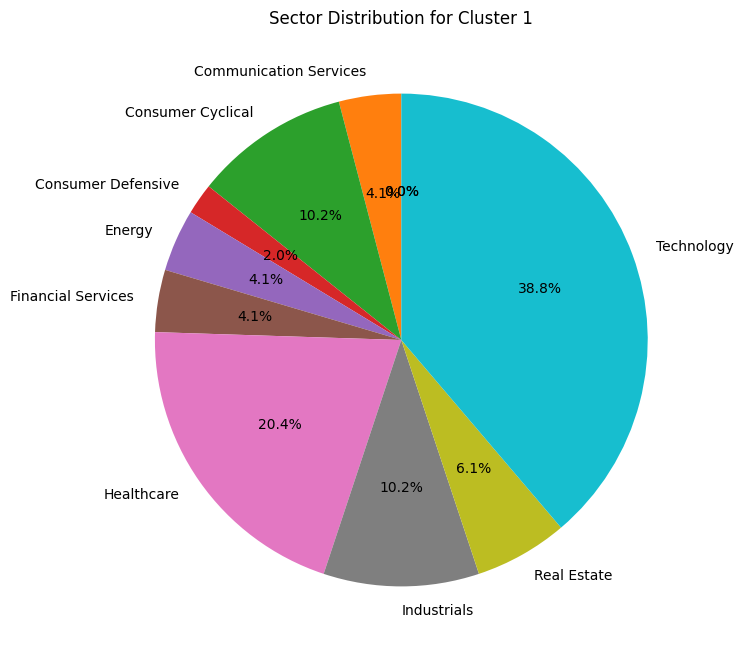

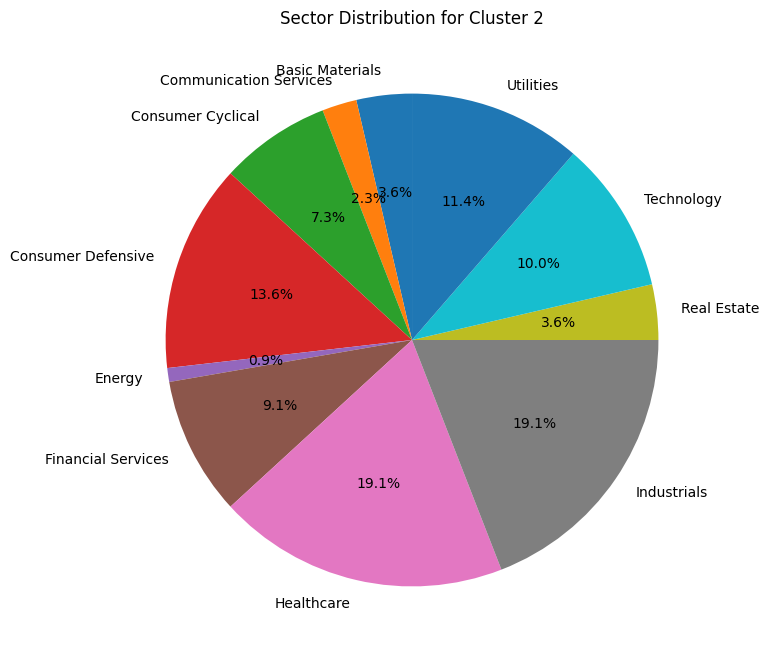

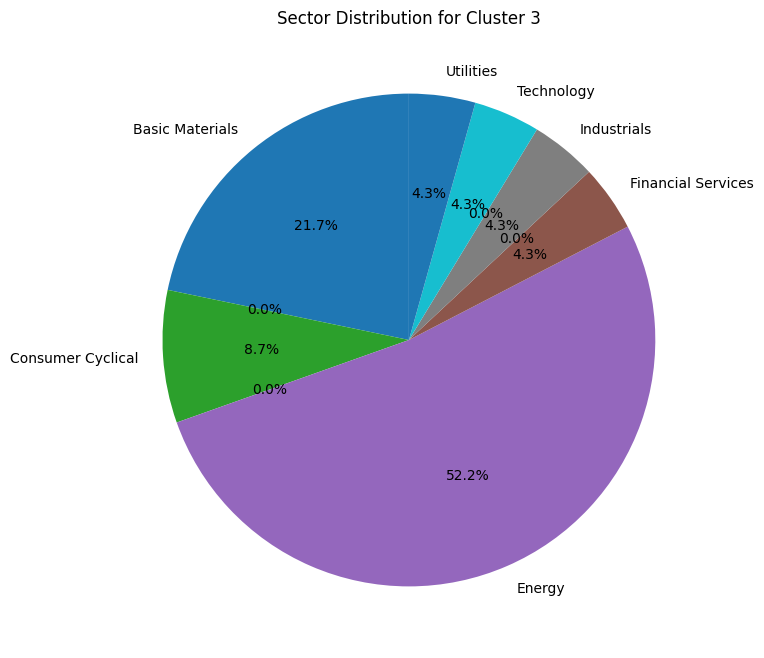

In [309]:
# Pie charts for each cluster- proportion of companies in each sector
for cluster in sector_distribution.index:
    plt.figure(figsize=(8, 8))
    sector_distribution.loc[cluster].plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Sector Distribution for Cluster {cluster}')
    plt.ylabel('')
    plt.show()

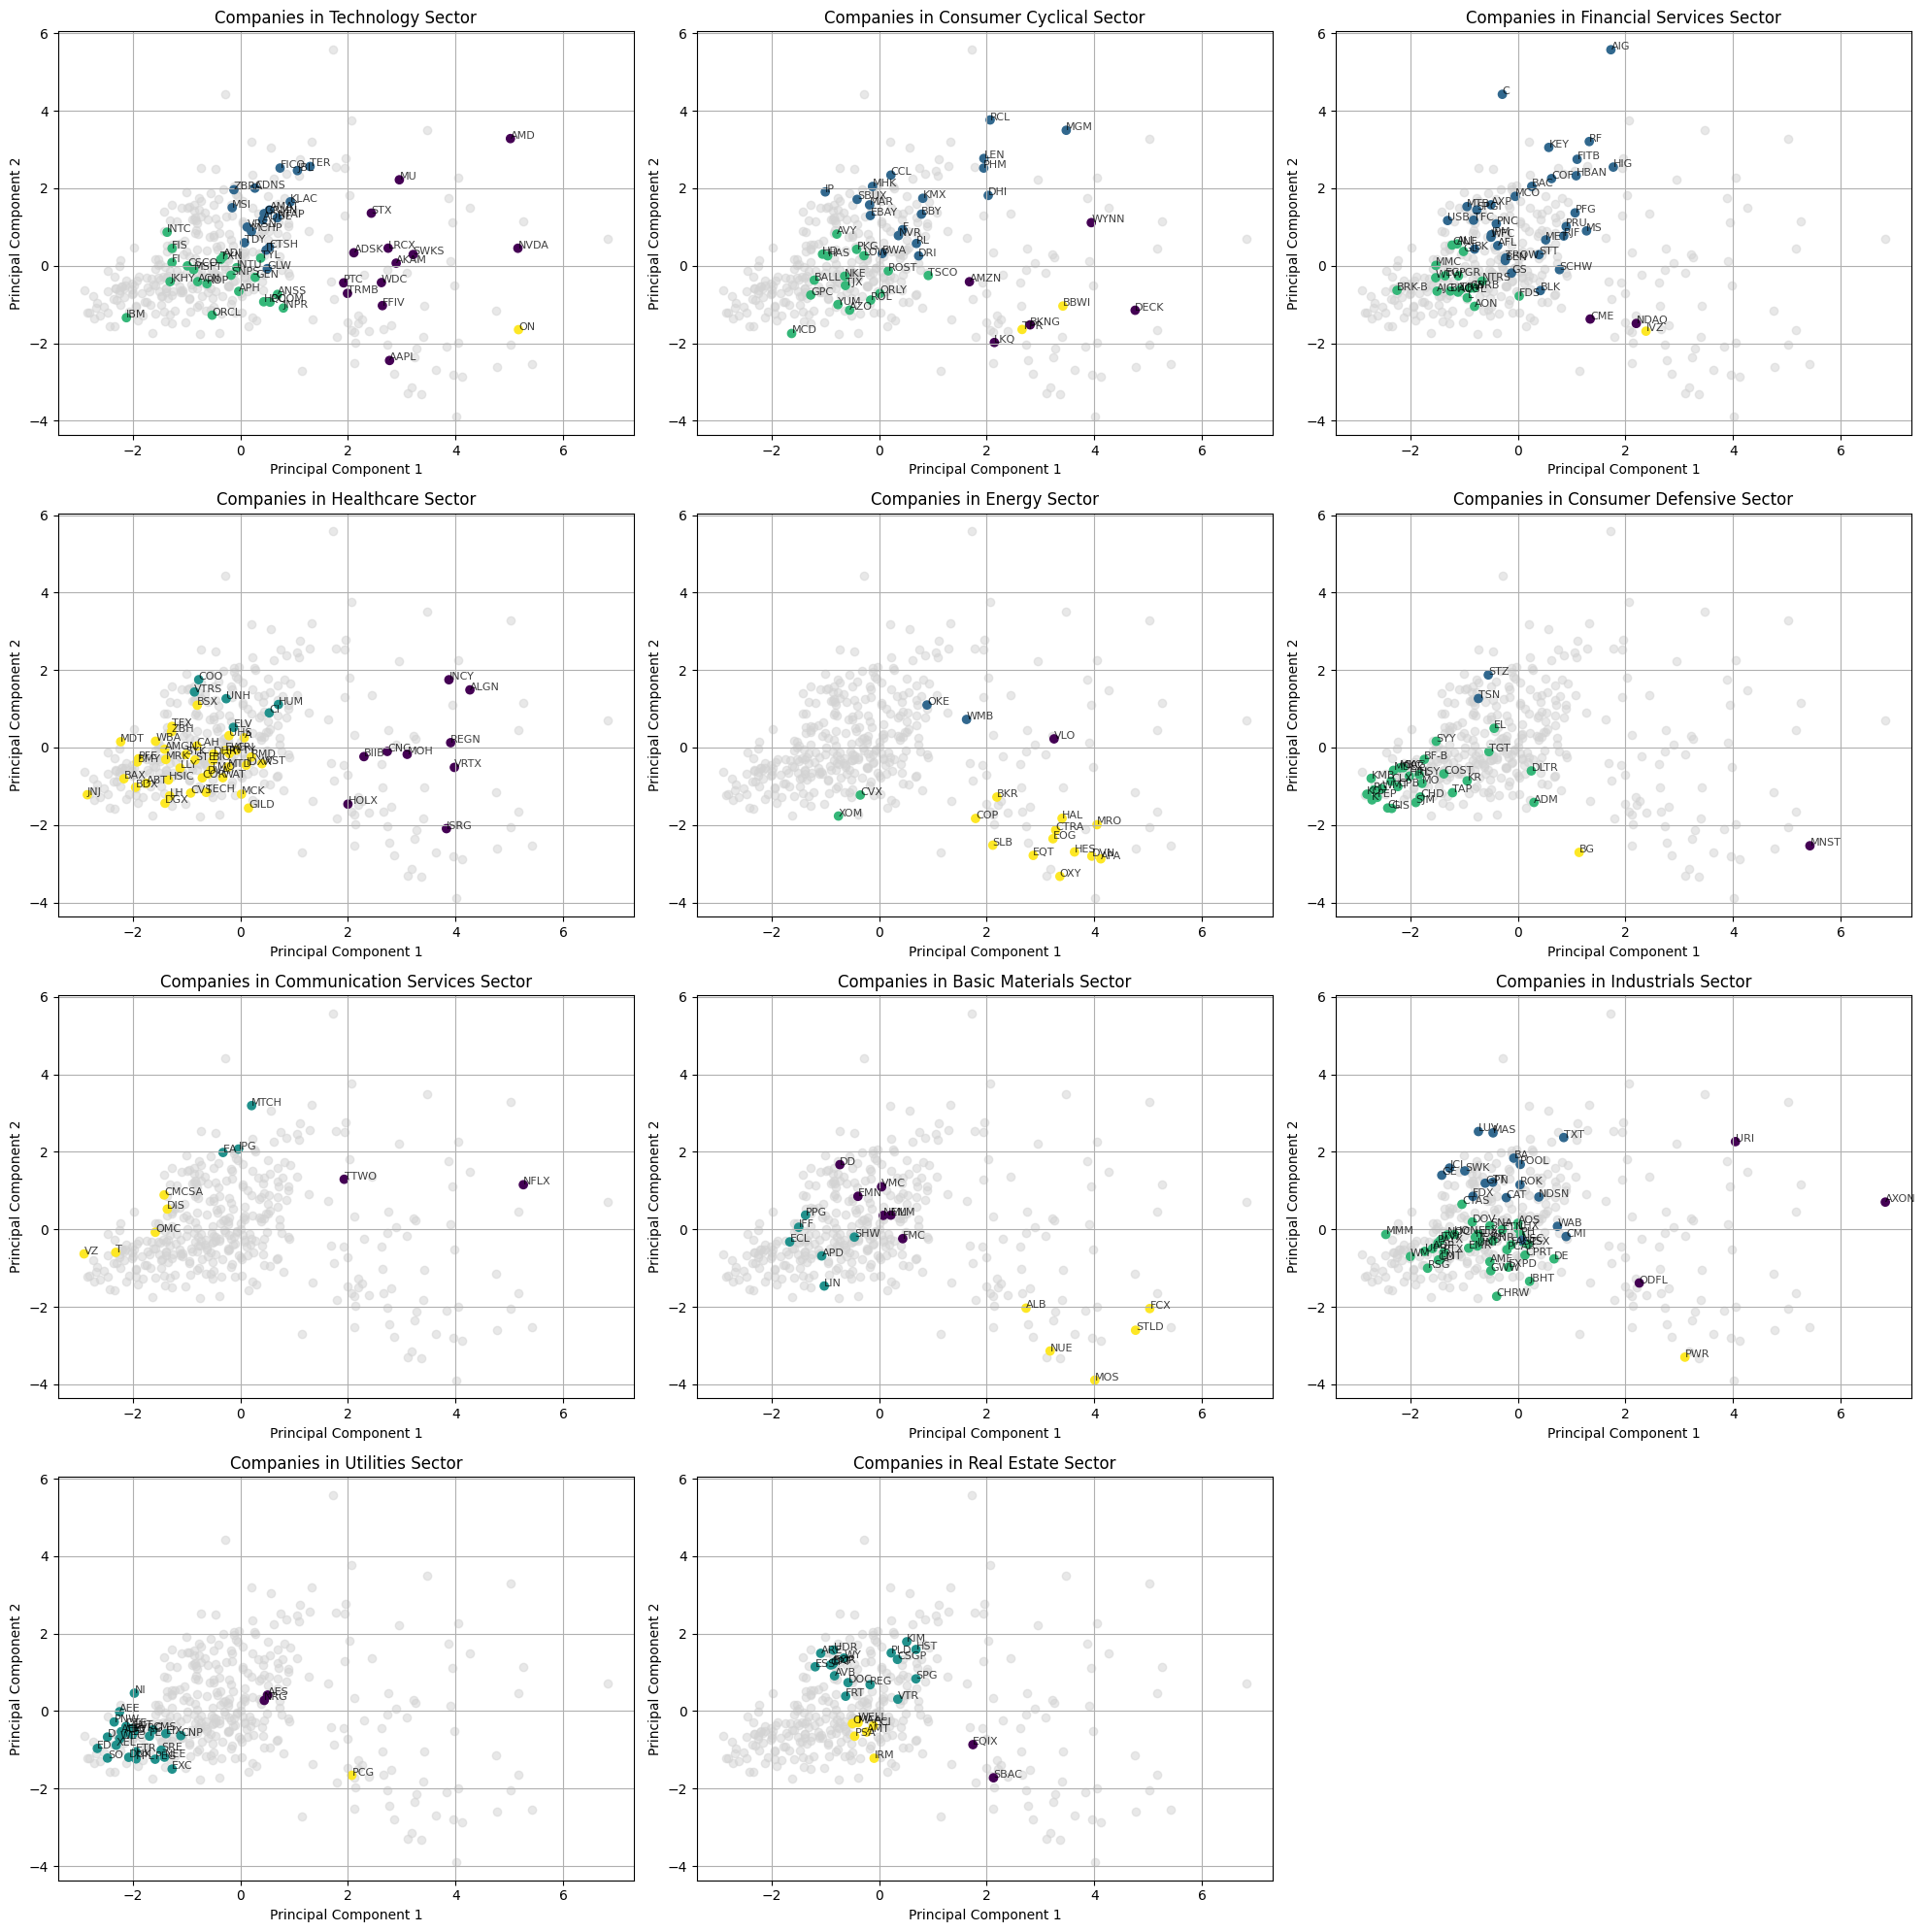

In [253]:
def plot_sectors_highlighted(kmeans_clusters, merged_data, sector_name, pca_components, ax):
    highlighted = merged_data[merged_data['GICS Sector'] == sector_name]
    greyed_out = merged_data[merged_data['GICS Sector'] != sector_name]
    
    ax.scatter(pca_components[greyed_out.index, 0], pca_components[greyed_out.index, 1], c='lightgrey', alpha=0.5, label='_nolegend_')
    scatter = ax.scatter(pca_components[highlighted.index, 0], pca_components[highlighted.index, 1], c=kmeans_clusters[highlighted.index], cmap='viridis', label=highlighted['Company'])
    
    for i, txt in enumerate(highlighted['Company']):
        ax.annotate(txt, (pca_components[highlighted.index[i], 0], pca_components[highlighted.index[i], 1]), fontsize=8, alpha=0.75)
    
    ax.set_title(f'Companies in {sector_name} Sector')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.grid(True)

sectors = merged_data['GICS Sector'].unique()

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for i, sector in enumerate(sectors):
    plot_sectors_highlighted(clusters, merged_data, sector, components_2d, axes[i])

for j in range(len(sectors), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Tracking Cluster changes over time for Amazon

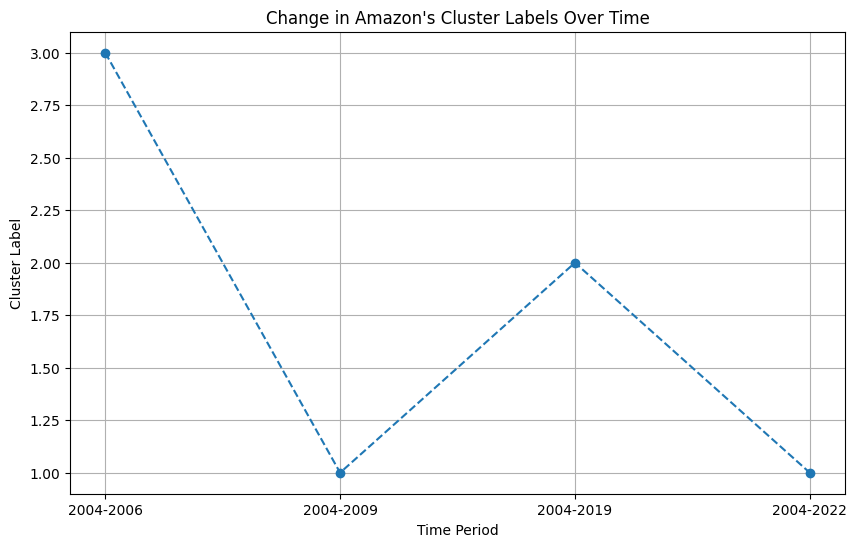

In [335]:
returns_df = pd.read_csv('daily_return_df1.csv', index_col=0, parse_dates=True)
gics_df = pd.read_csv('GICS_Sector.csv')
returns_df.index = pd.to_datetime(returns_df.index, utc=True)

pre_financial_crisis = returns_df.loc['2004-01-01':'2006-12-31']
financial_crisis = returns_df.loc['2007-01-01':'2009-06-30']
post_financial_crisis = returns_df.loc['2009-07-01':'2019-12-31']
covid_period = returns_df.loc['2020-01-01':'2022-12-31']

# storing the features for each period
feature_dict = {
    '2004-2006': {
        'avg_return': pre_financial_crisis.mean(),
        'volatility': pre_financial_crisis.std()
    },
    '2004-2009': {
        'avg_return_pre': pre_financial_crisis.mean(),
        'volatility_pre': pre_financial_crisis.std(),
        'avg_return_crisis': financial_crisis.mean(),
        'volatility_crisis': financial_crisis.std()
    },
    '2004-2019': {
        'avg_return_pre': pre_financial_crisis.mean(),
        'volatility_pre': pre_financial_crisis.std(),
        'avg_return_crisis': financial_crisis.mean(),
        'volatility_crisis': financial_crisis.std(),
        'avg_return_post': post_financial_crisis.mean(),
        'volatility_post': post_financial_crisis.std()
    },
    '2004-2022': {
        'avg_return_pre': pre_financial_crisis.mean(),
        'volatility_pre': pre_financial_crisis.std(),
        'avg_return_crisis': financial_crisis.mean(),
        'volatility_crisis': financial_crisis.std(),
        'avg_return_post': post_financial_crisis.mean(),
        'volatility_post': post_financial_crisis.std(),
        'avg_return_covid': covid_period.mean(),
        'volatility_covid': covid_period.std()
    }
}

# Create a dataframe for each period's feature matrix
feature_matrices = {}
for period, features in feature_dict.items():
    feature_matrices[period] = pd.DataFrame(features).dropna()

scaler = StandardScaler()
scaled_feature_matrices = {period: scaler.fit_transform(features) for period, features in feature_matrices.items()}

# Apply K-means clustering with k=4 to each period's feature matrix
kmeans_models = {period: KMeans(n_clusters=4, random_state=42, n_init=10).fit(features) for period, features in scaled_feature_matrices.items()}
cluster_labels = {period: model.labels_ for period, model in kmeans_models.items()}

# Extract Amazon's cluster label for each period
amazon_cluster_labels = {period: cluster_labels[period][list(feature_matrices[period].index).index('AMZN')] for period in cluster_labels}

plt.figure(figsize=(10, 6))
plt.plot(list(amazon_cluster_labels.keys()), list(amazon_cluster_labels.values()), marker='o', linestyle='--')
plt.title('Change in Amazon\'s Cluster Labels Over Time')
plt.xlabel('Time Period')
plt.ylabel('Cluster Label')
plt.grid(True)
plt.show()

1. 2004-2006 period: AMZN belongs to cluster 3
<br>In cluster 3, there are 51 companies, out of which 22 are in technology and 11 are in consumer
2. 2004-2009 period: Cluster 1
<br> In cluster 1, there are 114 companies, out of which 21 are in technology and 19 in industrials
3. 2004-2019 period: Cluster 2
<br> In cluster 2, there are 27 companies, out of which 8 are in healthcare and 7 in technology.
4. 2004-2022 period: cluster 1
<br> There are 49 companies, out of which 19 are in technology

From Internet:-<br>
Timeline  of sector changes:
1. 1994-1999: E-Commerce-> AMZN started as an online bookstore
2. 2002: Launch of AWS-> Entering Tech(Cloud computing)
3. 2010s-2020s: Diversification into Technology and Media
4. 2014: Acquisition of whole foods-> Consumer
5. 2017: started focusing on healthcare -> Created '1492' to focus on healthcare technologies.
<br>2018: Formed "Haven"(NGO) to improve healthcare access.
<br> Acquired PillPack(online pharmacy) and health navigator(provides APIs for digital health sevices)


In [336]:
for period in feature_matrices:
    feature_matrices[period]['Company'] = feature_matrices[period].index
    feature_matrices[period] = feature_matrices[period].merge(gics_df, on='Company')

In [343]:
# Determine the dominant sector for each cluster
dominant_sectors = {}
for period in feature_matrices:
    feature_matrices[period]['Cluster'] = cluster_labels[period]
    sector_distribution = feature_matrices[period].groupby(['Cluster', 'GICS Sector']).size().unstack(fill_value=0)
    display(sector_distribution)
    dominant_sectors[period] = sector_distribution.idxmax(axis=1)

dominant_sectors_df = pd.DataFrame(dominant_sectors)
dominant_sectors_df

GICS Sector  Basic Materials  Communication Services  Consumer Cyclical  \
Cluster                                                                   
0                          7                       0                 11   
1                          2                       0                  2   
2                          7                       7                 17   
3                          1                       3                 11   

GICS Sector  Consumer Defensive  Energy  Financial Services  Healthcare  \
Cluster                                                                   
0                             4      15                  17          17   
1                             1       2                   2           3   
2                            26       0                  33          27   
3                             0       0                   0           7   

GICS Sector  Industrials  Real Estate  Technology  Utilities  
Cluster                                                       
0                     22           20           7          9  
1                      1            2           6          0  
2                     28            3          17         19  
3                      6            1          22          0

GICS Sector  Basic Materials  Communication Services  Consumer Cyclical  \
Cluster                                                                   
0                          1                       2                 10   
1                          6                       1                 14   
2                          7                       6                 13   
3                          3                       1                  4   

GICS Sector  Consumer Defensive  Energy  Financial Services  Healthcare  \
Cluster                                                                   
0                             0       0                  21           1   
1                             4      12                  15           9   
2                            26       3                  14          37   
3                             1       2                   2           7   

GICS Sector  Industrials  Real Estate  Technology  Utilities  
Cluster                                                       
0                      5           11           8          0  
1                     19           11          21          2  
2                     31            2          16         26  
3                      2            2           7          0

GICS Sector  Basic Materials  Communication Services  Consumer Cyclical  \
Cluster                                                                   
0                          2                       4                 15   
1                          7                       5                 15   
2                          1                       1                  4   
3                          7                       0                  7   

GICS Sector  Consumer Defensive  Energy  Financial Services  Healthcare  \
Cluster                                                                   
0                             2       2                  10           7   
1                            26       2                  19          37   
2                             1       0                   1           8   
3                             2      13                  22           2   

GICS Sector  Industrials  Real Estate  Technology  Utilities  
Cluster                                                       
0                     13            6          21          0  
1                     31            4          15         25  
2                      2            2           7          0  
3                     11           14           9          3

GICS Sector  Basic Materials  Communication Services  Consumer Cyclical  \
Cluster                                                                   
0                          4                       3                 18   
1                          0                       2                  5   
2                          8                       5                 16   
3                          5                       0                  2   

GICS Sector  Consumer Defensive  Energy  Financial Services  Healthcare  \
Cluster                                                                   
0                             0       1                  29           2   
1                             1       2                   2          10   
2                            30       2                  20          42   
3                             0      12                   1           0   

GICS Sector  Industrials  Real Estate  Technology  Utilities  
Cluster                                                       
0                      9           15          10          2  
1                      5            3          19          0  
2                     42            8          22         25  
3                      1            0           1          1

2004-2006           2004-2009           2004-2019  \
Cluster                                                               
0               Industrials  Financial Services          Technology   
1                Technology          Technology          Healthcare   
2        Financial Services          Healthcare          Healthcare   
3                Technology          Healthcare  Financial Services   

                  2004-2022  
Cluster                      
0        Financial Services  
1                Technology  
2                Healthcare  
3                    Energy

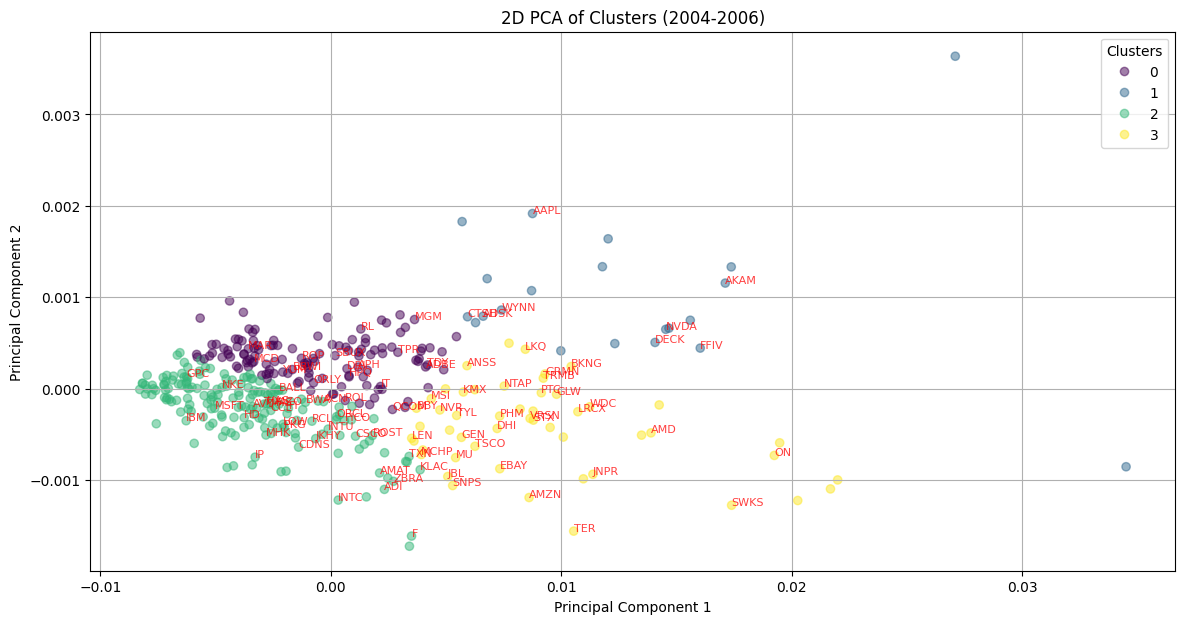

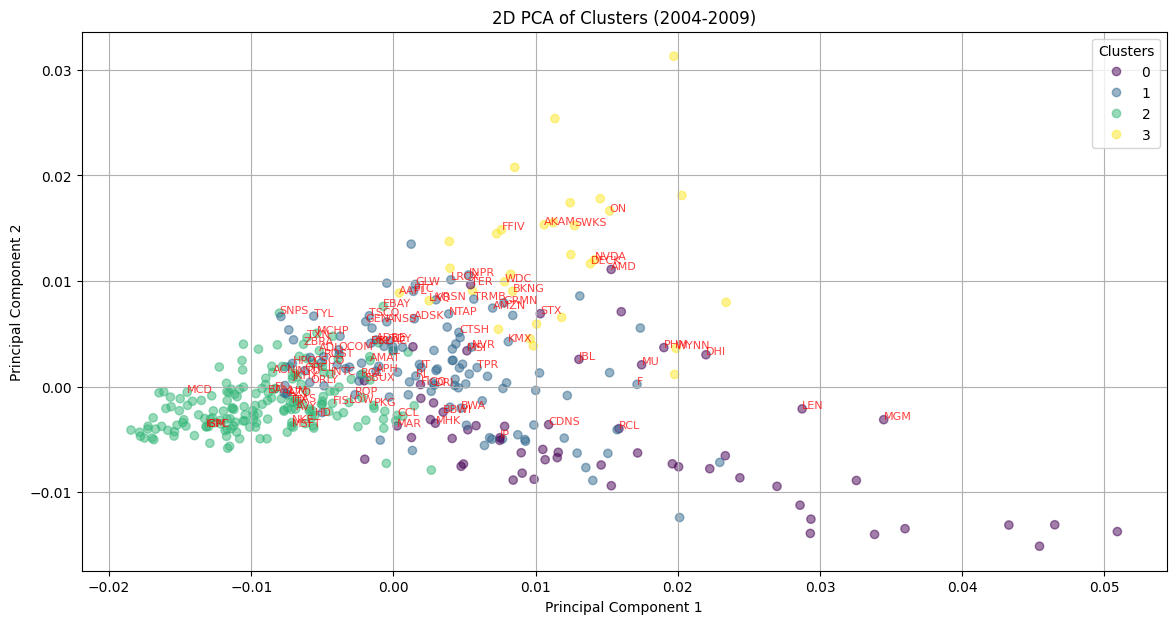

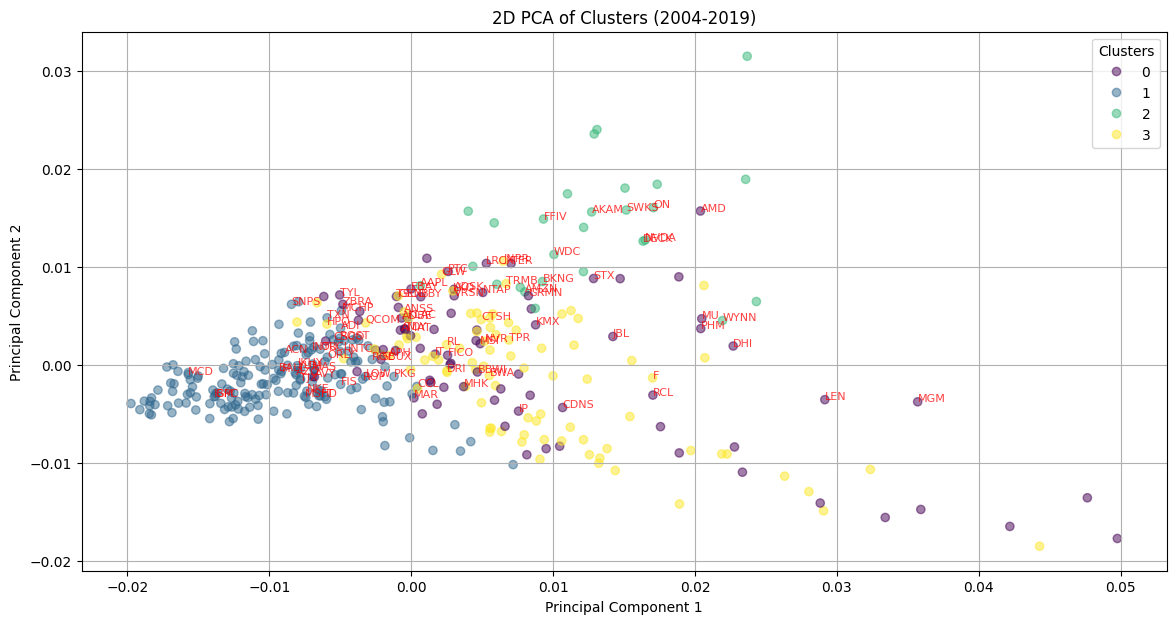

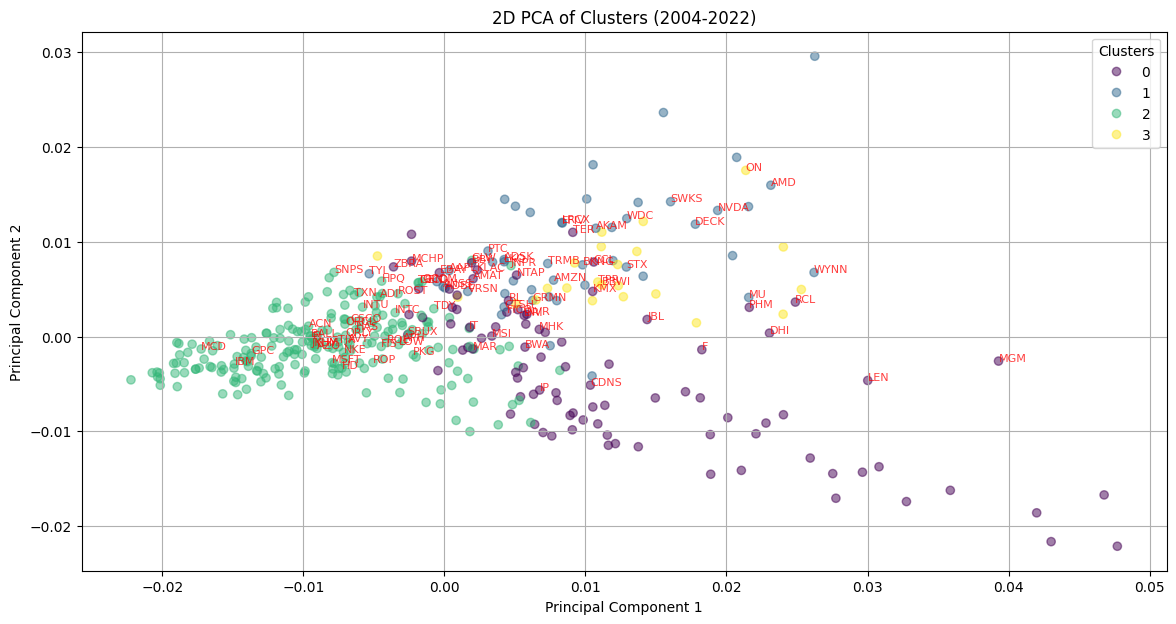

In [346]:
def plot_2d_clusters(features, cluster_labels, title, highlight_company, tech_and_consumer_companies):
    pca = PCA(n_components=2)
    components_2d = pca.fit_transform(features)
    
    plt.figure(figsize=(14, 7))
    scatter = plt.scatter(components_2d[:, 0], components_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)

    # Highlight specific companies
    for i, company in enumerate(features.index):
        if company == highlight_company or company in tech_and_consumer_companies:
            plt.annotate(company, (components_2d[i, 0], components_2d[i, 1]), fontsize=8, alpha=0.75, color='red')
        else:
            plt.annotate('', (components_2d[i, 0], components_2d[i, 1]), fontsize=8, alpha=0.75)

    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.show()

tech_and_consumer_companies = gics_df[gics_df['GICS Sector'].isin(['Technology', 'Consumer Cyclical'])]['Company'].tolist()

# Plot for each period
for period in feature_matrices:
    plot_2d_clusters(
        features=feature_matrices[period].set_index('Company').drop(columns=['GICS Sector', 'GICS Industry', 'Cluster']),
        cluster_labels=cluster_labels[period],
        title=f'2D PCA of Clusters ({period})',
        highlight_company='AMZN',
        tech_and_consumer_companies=tech_and_consumer_companies
    )

### Clustering with k=5 to 11

In [254]:
def apply_kmeans(k, data):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data)
    return clusters

results = {}
for k in range(5, 12):
    clusters = apply_kmeans(k, scaled_features)
    feature_matrix[f'Cluster_k{k}'] = clusters
    results[k] = clusters

feature_matrix.head()

Company  avg_return_pre_crisis  volatility_pre_crisis  avg_return_crisis  \
0    MSFT               0.000356               0.011085           0.000026   
1    NVDA               0.002036               0.030606          -0.000259   
2    AAPL               0.003060               0.024775           0.001278   
3    AMZN              -0.000049               0.024757           0.001847   
4   BRK-B               0.000391               0.008356          -0.000183   

   volatility_crisis  avg_return_post_crisis  volatility_post_crisis  \
0           0.025142                0.000914                0.014379   
1           0.043019                0.001503                0.025708   
2           0.030150                0.001192                0.016208   
3           0.036886                0.001374                0.020291   
4           0.021222                0.000581                0.011499   

   avg_return_covid  volatility_covid  Cluster_k5  Cluster_k6  Cluster_k7  \
0          0.000832          0.021890           0           1           0   
1          0.001829          0.035245           4           3           5   
2          0.001053          0.023264           4           3           6   
3          0.000177          0.024624           4           3           5   
4          0.000540          0.016116           0           1           2   

   Cluster_k8  Cluster_k9  Cluster_k10  Cluster_k11  
0           4           2            1            1  
1           5           8            6           10  
2           7           5            7            4  
3           5           8            6           10  
4           2           4            0            6

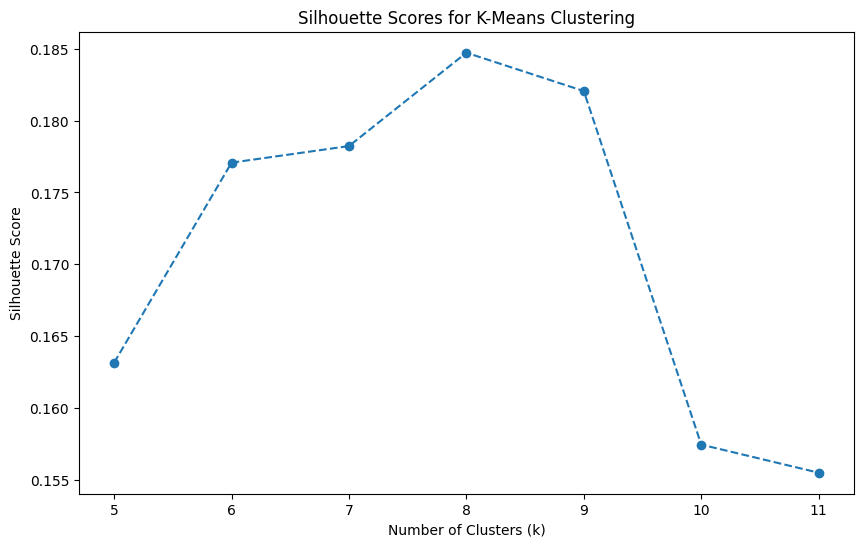

In [255]:
from sklearn.metrics import silhouette_score
k_range = range(5, 12)
silhouette_scores = []
cluster_results = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, clusters)
    silhouette_scores.append(silhouette_avg)
    
    feature_matrix[f'Cluster_k{k}'] = clusters
    cluster_results[k] = clusters

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

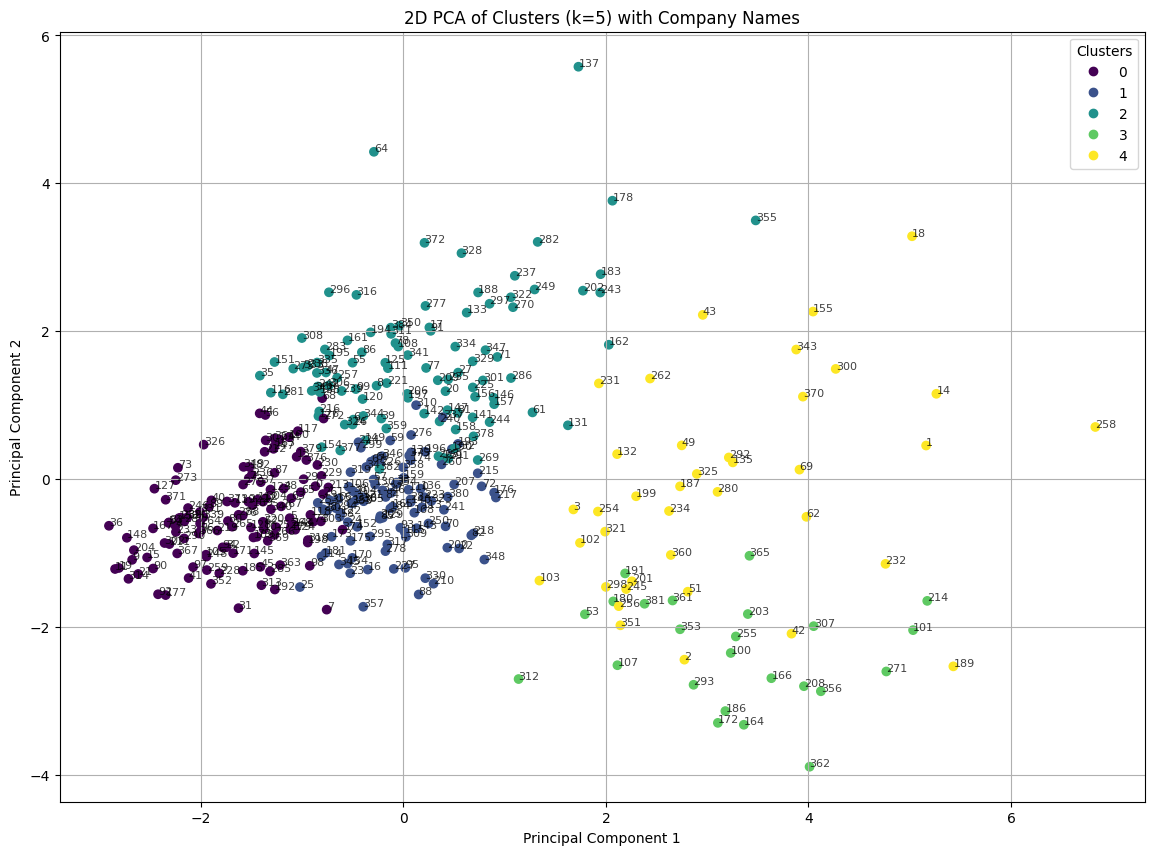

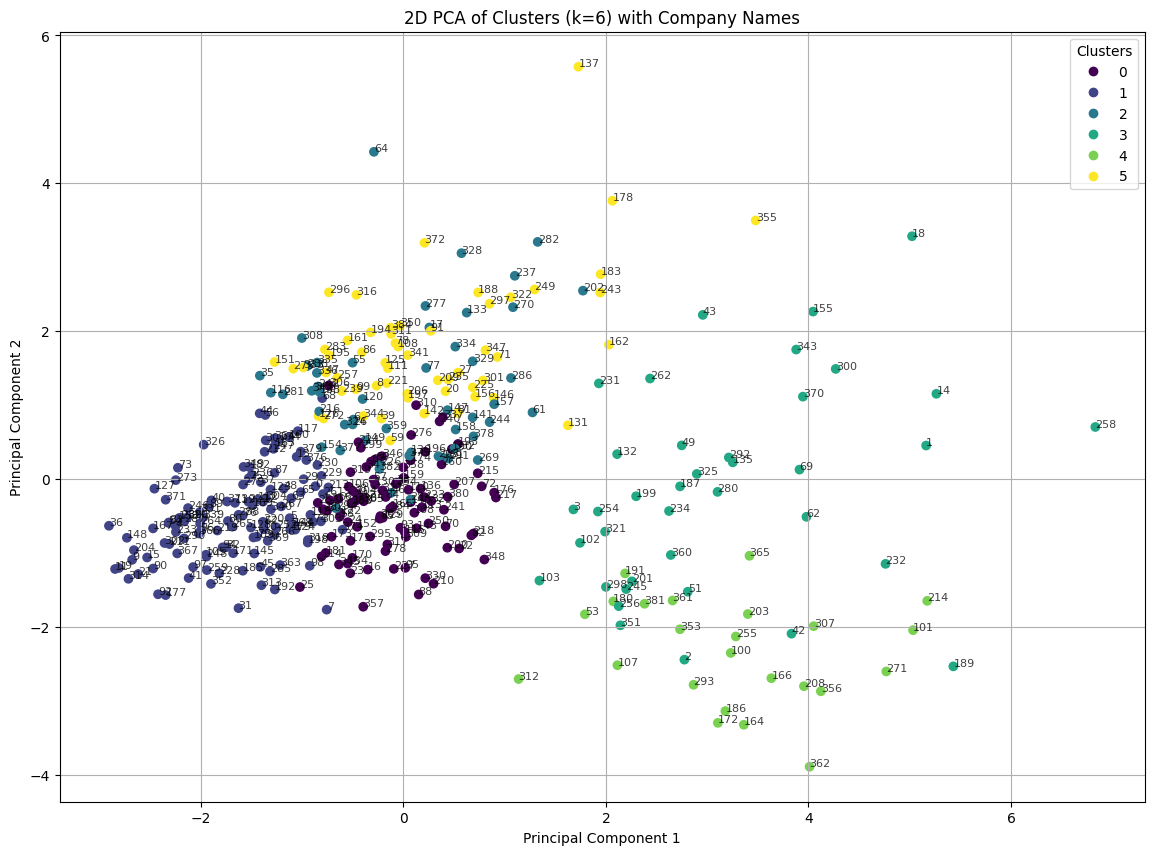

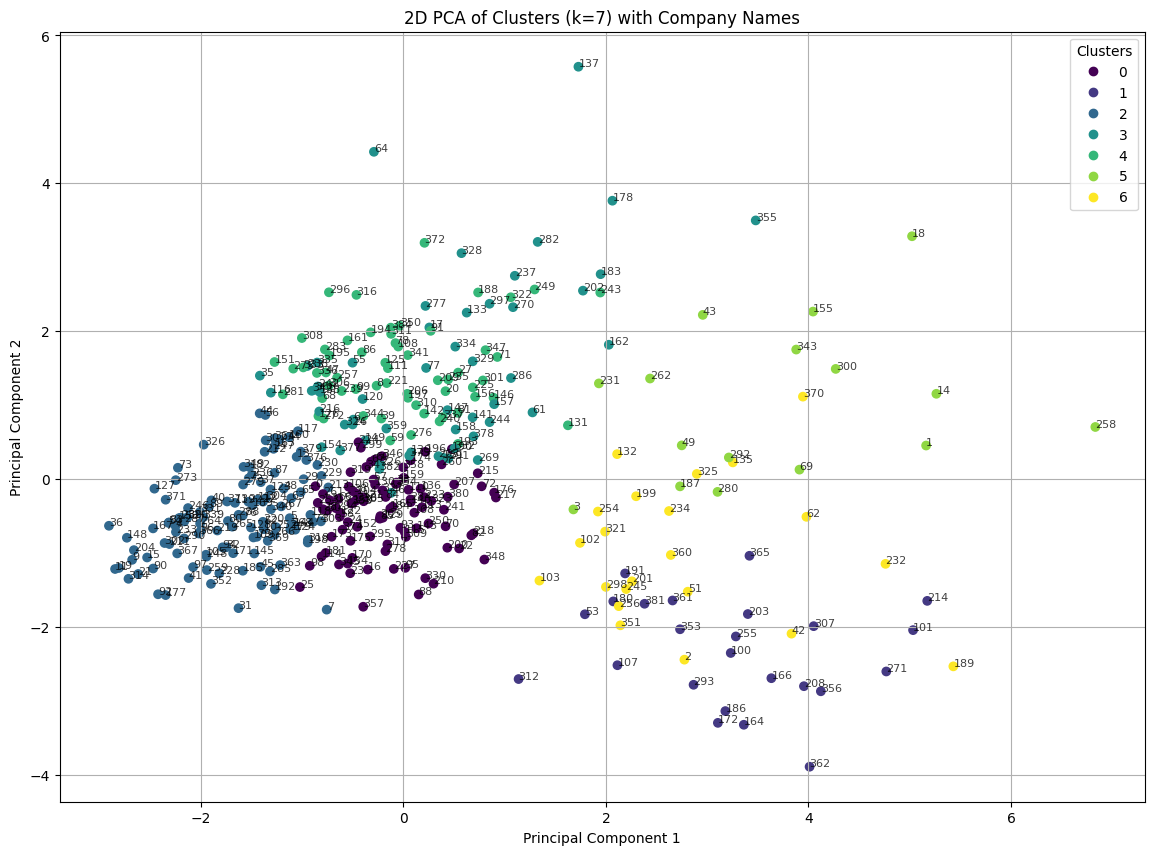

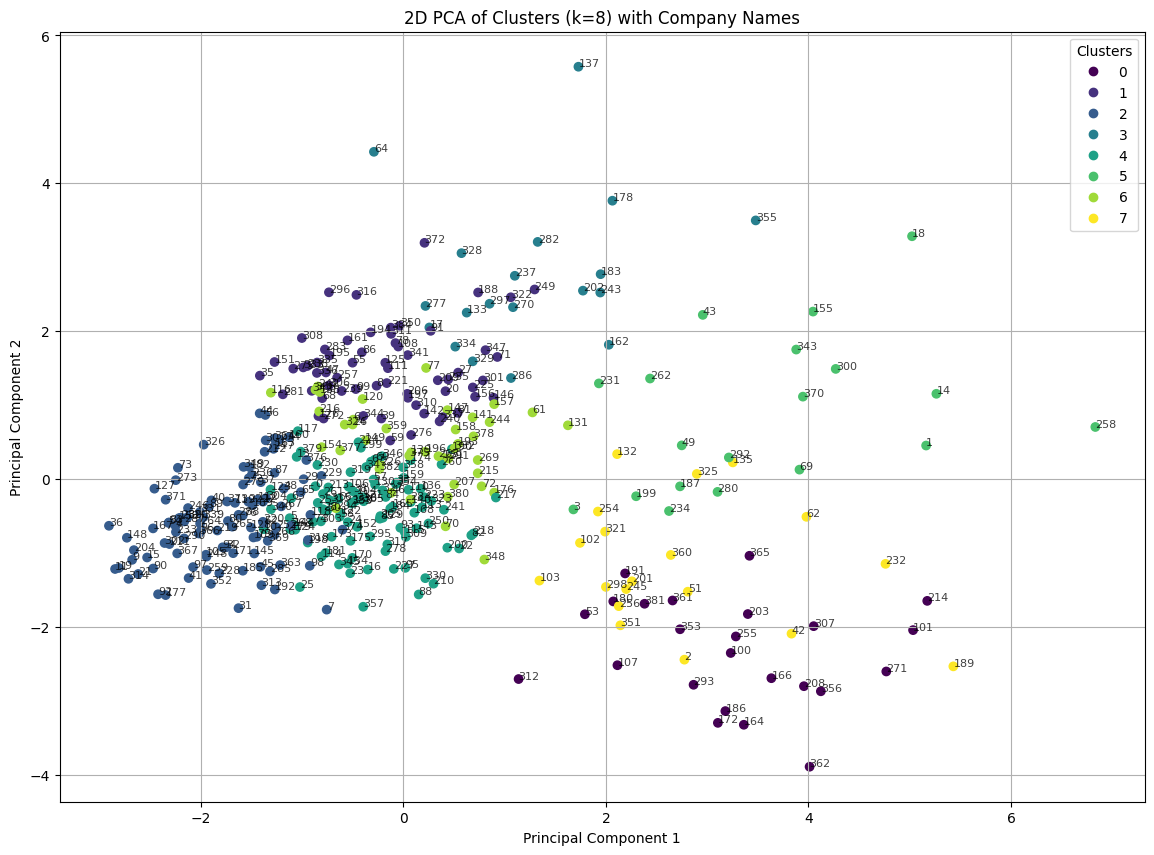

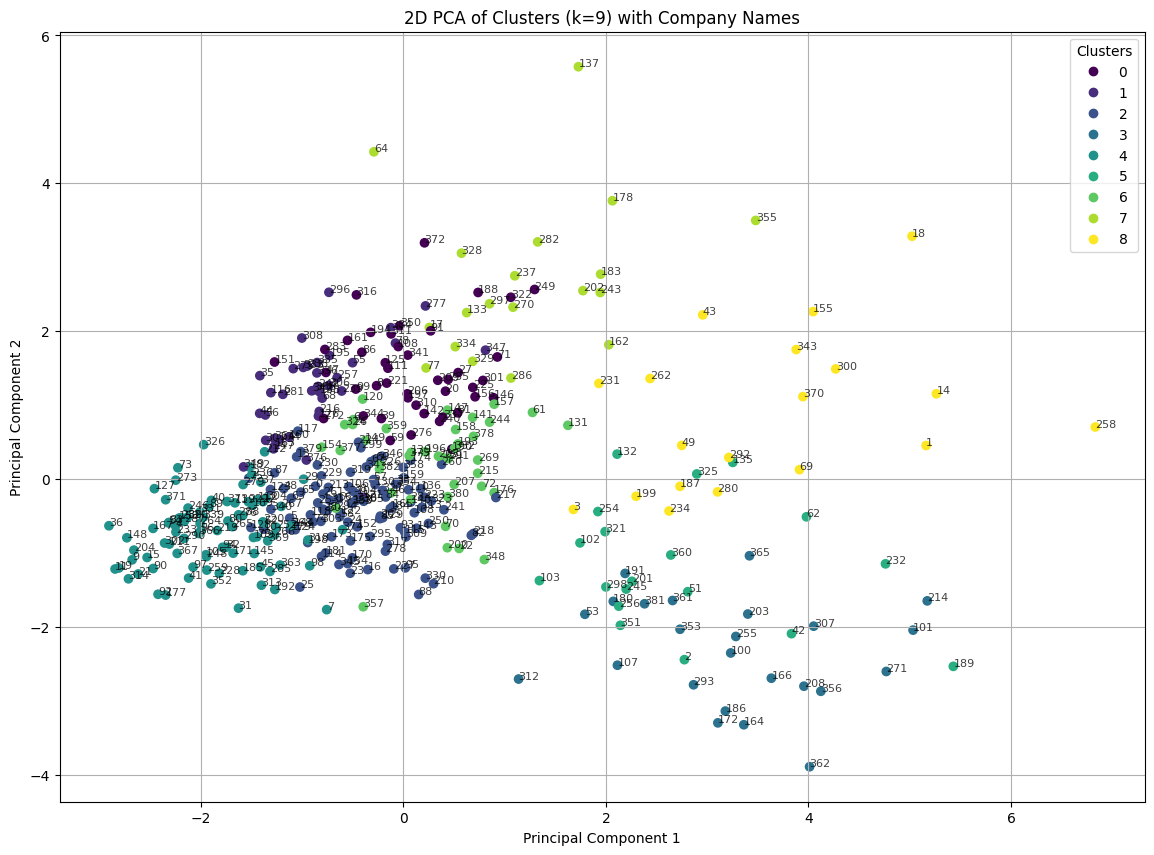

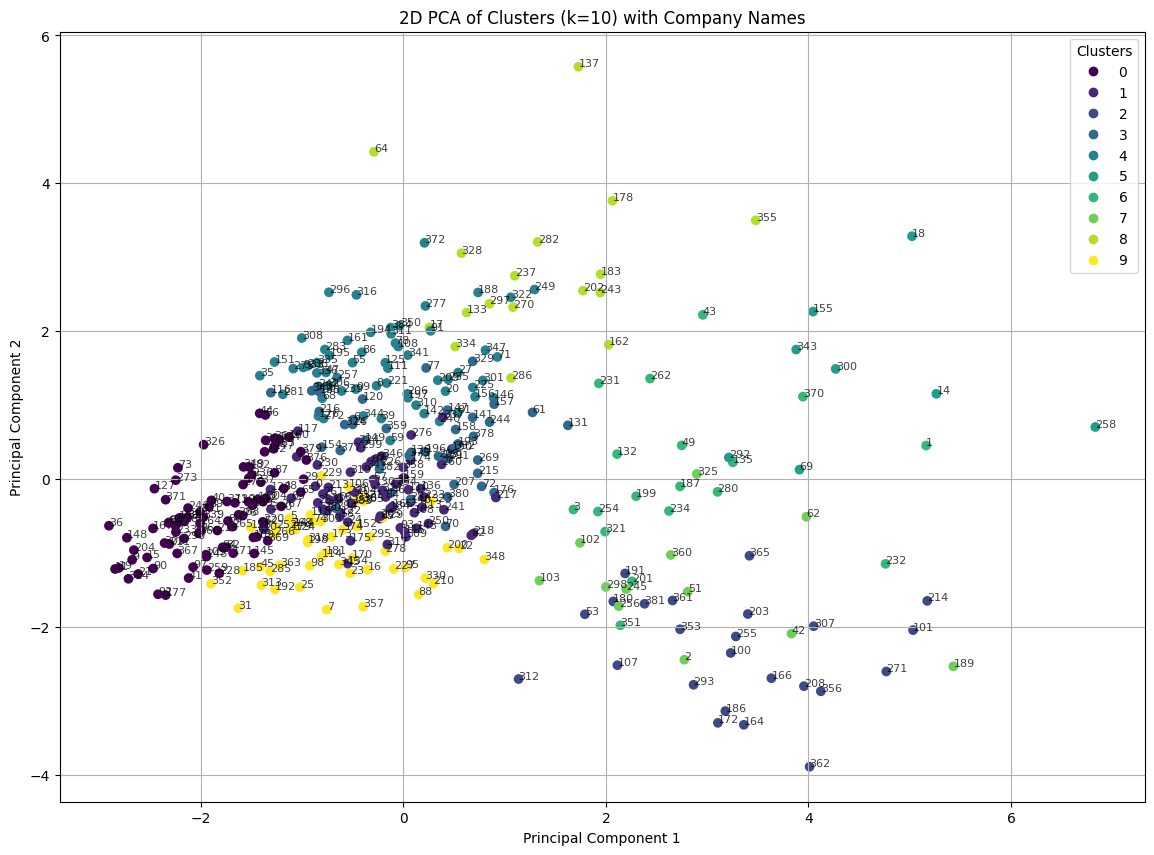

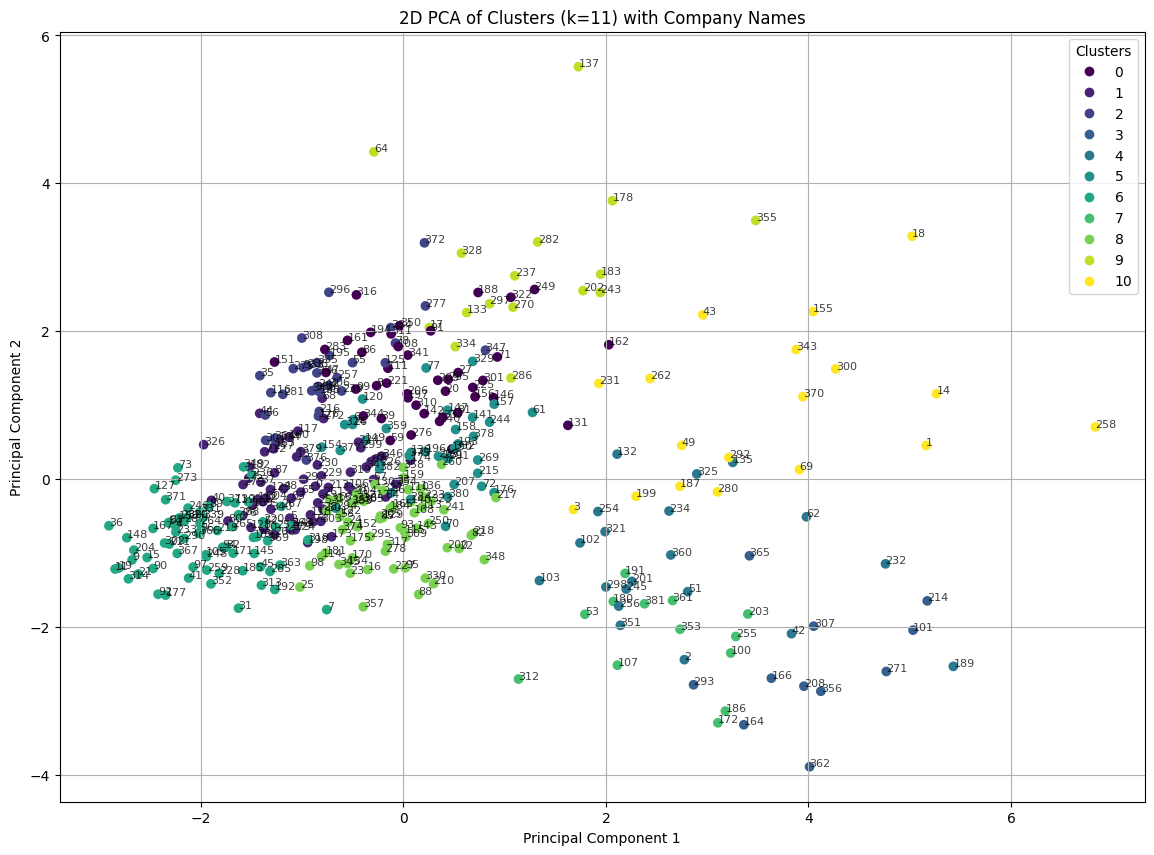

In [256]:
def plot_clusters_2d(components_2d, clusters, k):
    plt.figure(figsize=(14, 10))
    scatter = plt.scatter(components_2d[:, 0], components_2d[:, 1], c=clusters, cmap='viridis')
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.title(f'2D PCA of Clusters (k={k}) with Company Names')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)

    for i, txt in enumerate(feature_matrix.index):
        plt.annotate(txt, (components_2d[i, 0], components_2d[i, 1]), fontsize=8, alpha=0.75)

    plt.show()

for k in k_range:
    plot_clusters_2d(components_2d, cluster_results[k], k)

In [117]:
sector_dispersion_percentages[5]

GICS Sector  Basic Materials  Communication Services  Consumer Cyclical  \
Cluster                                                                   
0                   4.000000                0.000000          11.333333   
1                  21.739130                0.000000           8.695652   
2                   0.000000                4.000000          16.000000   
3                   1.818182                7.272727          21.818182   
4                   3.787879                3.787879           4.545455   

GICS Sector  Consumer Defensive     Energy  Financial Services  Healthcare  \
Cluster                                                                      
0                      4.000000   1.333333           14.666667   14.666667   
1                      0.000000  52.173913            4.347826    0.000000   
2                      4.000000   0.000000            4.000000   32.000000   
3                      1.818182   3.636364           21.818182    1.818182   
4                     17.424242   0.757576           12.121212   17.424242   

GICS Sector  Industrials  Real Estate  Technology  Utilities  
Cluster                                                       
0              18.666667    14.000000   16.000000   1.333333  
1               4.347826     0.000000    4.347826   4.347826  
2               8.000000     8.000000   24.000000   0.000000  
3              10.909091     5.454545   23.636364   0.000000  
4              15.151515     0.000000    6.060606  18.939394

In [259]:
def calculate_sector_dispersion_percentage(cluster_labels):
    merged_data_k = feature_matrix[['Company']].copy()
    merged_data_k['Cluster'] = cluster_labels
    merged_data_k = pd.merge(merged_data_k, gics_df, on='Company')
    sector_distribution_k = merged_data_k.groupby(['Cluster', 'GICS Sector']).size().unstack(fill_value=0)
    sector_distribution_k_percentage = sector_distribution_k.div(sector_distribution_k.sum(axis=0), axis=1) * 100
    return sector_distribution_k_percentage

sector_dispersion_percentages = {}

for k in k_range:
    sector_dispersion_percentages[k] = calculate_sector_dispersion_percentage(cluster_results[k])

for k in k_range:
    print(f"Sector Dispersion Percentages for k = {k}")
    display(sector_dispersion_percentages[k])

Sector Dispersion Percentages for k = 5


GICS Sector  Basic Materials  Communication Services  Consumer Cyclical  \
Cluster                                                                   
0                  23.529412                    50.0          14.634146   
1                  29.411765                     0.0          26.829268   
2                  17.647059                    30.0          41.463415   
3                  29.411765                     0.0           4.878049   
4                   0.000000                    20.0          12.195122   

GICS Sector  Consumer Defensive     Energy  Financial Services  Healthcare  \
Cluster                                                                      
0                     74.193548   5.882353           28.846154   38.888889   
1                     12.903226   5.882353           13.461538   35.185185   
2                      6.451613  11.764706           51.923077    9.259259   
3                      3.225806  70.588235            1.923077    0.000000   
4                      3.225806   5.882353            3.846154   16.666667   

GICS Sector  Industrials  Real Estate  Technology  Utilities  
Cluster                                                       
0              29.824561     0.000000   13.461538  89.285714  
1              40.350877    26.923077   36.538462   0.000000  
2              22.807018    65.384615   23.076923   7.142857  
3               1.754386     0.000000    1.923077   3.571429  
4               5.263158     7.692308   25.000000   0.000000

Sector Dispersion Percentages for k = 6


GICS Sector  Basic Materials  Communication Services  Consumer Cyclical  \
Cluster                                                                   
0                  23.529412                     0.0          26.829268   
1                  23.529412                    50.0          12.195122   
2                   5.882353                     0.0          14.634146   
3                   0.000000                    20.0          12.195122   
4                  29.411765                     0.0           4.878049   
5                  17.647059                    30.0          29.268293   

GICS Sector  Consumer Defensive     Energy  Financial Services  Healthcare  \
Cluster                                                                      
0                     16.129032   5.882353            7.692308   33.333333   
1                     74.193548   5.882353           28.846154   38.888889   
2                      0.000000   0.000000           51.923077    1.851852   
3                      3.225806   5.882353            3.846154   16.666667   
4                      3.225806  70.588235            1.923077    0.000000   
5                      3.225806  11.764706            5.769231    9.259259   

GICS Sector  Industrials  Real Estate  Technology  Utilities  
Cluster                                                       
0              38.596491    26.923077   36.538462   0.000000  
1              29.824561     0.000000   13.461538  89.285714  
2               3.508772    53.846154    0.000000   7.142857  
3               5.263158     7.692308   25.000000   0.000000  
4               1.754386     0.000000    1.923077   3.571429  
5              21.052632    11.538462   23.076923   0.000000

Sector Dispersion Percentages for k = 7


GICS Sector  Basic Materials  Communication Services  Consumer Cyclical  \
Cluster                                                                   
0                  23.529412                     0.0          24.390244   
1                  29.411765                     0.0           4.878049   
2                  23.529412                    50.0          12.195122   
3                   5.882353                     0.0          21.951220   
4                  17.647059                    30.0          24.390244   
5                   0.000000                    20.0           2.439024   
6                   0.000000                     0.0           9.756098   

GICS Sector  Consumer Defensive     Energy  Financial Services  Healthcare  \
Cluster                                                                      
0                     12.903226   5.882353            9.615385   37.037037   
1                      3.225806  70.588235            1.923077    0.000000   
2                     74.193548   5.882353           28.846154   33.333333   
3                      0.000000   0.000000           51.923077    0.000000   
4                      6.451613  11.764706            3.846154   12.962963   
5                      0.000000   0.000000            0.000000    9.259259   
6                      3.225806   5.882353            3.846154    7.407407   

GICS Sector  Industrials  Real Estate  Technology  Utilities  
Cluster                                                       
0              40.350877    26.923077   32.692308   0.000000  
1               1.754386     0.000000    1.923077   3.571429  
2              28.070175     0.000000   11.538462  89.285714  
3               3.508772    50.000000    0.000000   7.142857  
4              21.052632    15.384615   28.846154   0.000000  
5               3.508772     0.000000   11.538462   0.000000  
6               1.754386     7.692308   13.461538   0.000000

Sector Dispersion Percentages for k = 8


GICS Sector  Basic Materials  Communication Services  Consumer Cyclical  \
Cluster                                                                   
0                  29.411765                     0.0           4.878049   
1                  17.647059                    30.0          21.951220   
2                  17.647059                    50.0           9.756098   
3                   0.000000                     0.0          14.634146   
4                  17.647059                     0.0          26.829268   
5                   0.000000                    20.0           4.878049   
6                  17.647059                     0.0           9.756098   
7                   0.000000                     0.0           7.317073   

GICS Sector  Consumer Defensive     Energy  Financial Services  Healthcare  \
Cluster                                                                      
0                      3.225806  70.588235            1.923077    0.000000   
1                      6.451613   5.882353            7.692308   12.962963   
2                     67.741935   5.882353           17.307692   35.185185   
3                      0.000000   0.000000           19.230769    0.000000   
4                     19.354839   5.882353           15.384615   35.185185   
5                      0.000000   0.000000            0.000000   11.111111   
6                      0.000000   5.882353           34.615385    0.000000   
7                      3.225806   5.882353            3.846154    5.555556   

GICS Sector  Industrials  Real Estate  Technology  Utilities  
Cluster                                                       
0               1.754386     0.000000    1.923077   3.571429  
1              22.807018    23.076923   26.923077   0.000000  
2              21.052632     0.000000    9.615385  89.285714  
3               1.754386     7.692308    0.000000   0.000000  
4              42.105263    26.923077   30.769231   0.000000  
5               3.508772     0.000000   13.461538   0.000000  
6               5.263158    34.615385    5.769231   7.142857  
7               1.754386     7.692308   11.538462   0.000000

Sector Dispersion Percentages for k = 9


GICS Sector  Basic Materials  Communication Services  Consumer Cyclical  \
Cluster                                                                   
0                  11.764706                    30.0          14.634146   
1                   5.882353                    20.0          12.195122   
2                  17.647059                     0.0          26.829268   
3                  29.411765                     0.0           4.878049   
4                  17.647059                    30.0           7.317073   
5                   0.000000                     0.0           7.317073   
6                  17.647059                     0.0           9.756098   
7                   0.000000                     0.0          12.195122   
8                   0.000000                    20.0           4.878049   

GICS Sector  Consumer Defensive     Energy  Financial Services  Healthcare  \
Cluster                                                                      
0                      3.225806   5.882353            3.846154    9.259259   
1                      3.225806   0.000000           11.538462    9.259259   
2                     19.354839   5.882353           19.230769   38.888889   
3                      3.225806  70.588235            1.923077    0.000000   
4                     67.741935   5.882353            9.615385   25.925926   
5                      3.225806   5.882353            3.846154    5.555556   
6                      0.000000   5.882353           30.769231    0.000000   
7                      0.000000   0.000000           19.230769    0.000000   
8                      0.000000   0.000000            0.000000   11.111111   

GICS Sector  Industrials  Real Estate  Technology  Utilities  
Cluster                                                       
0              12.280702     3.846154   28.846154   0.000000  
1              10.526316    34.615385    3.846154   0.000000  
2              43.859649    23.076923   26.923077   0.000000  
3               1.754386     0.000000    1.923077   3.571429  
4              17.543860     0.000000    3.846154  89.285714  
5               1.754386     7.692308   11.538462   0.000000  
6               7.017544    19.230769    9.615385   7.142857  
7               1.754386    11.538462    0.000000   0.000000  
8               3.508772     0.000000   13.461538   0.000000

Sector Dispersion Percentages for k = 10


GICS Sector  Basic Materials  Communication Services  Consumer Cyclical  \
Cluster                                                                   
0                  17.647059                    50.0           4.878049   
1                   5.882353                     0.0          24.390244   
2                  29.411765                     0.0           4.878049   
3                  17.647059                     0.0           9.756098   
4                  17.647059                    30.0          24.390244   
5                   0.000000                    10.0           0.000000   
6                   0.000000                    10.0           9.756098   
7                   0.000000                     0.0           2.439024   
8                   0.000000                     0.0          12.195122   
9                  11.764706                     0.0           7.317073   

GICS Sector  Consumer Defensive     Energy  Financial Services  Healthcare  \
Cluster                                                                      
0                     61.290323   0.000000           13.461538   25.925926   
1                      9.677419   0.000000            3.846154   24.074074   
2                      3.225806  70.588235            1.923077    0.000000   
3                      0.000000   5.882353           34.615385    0.000000   
4                      6.451613   5.882353            7.692308   12.962963   
5                      0.000000   0.000000            0.000000    5.555556   
6                      0.000000   5.882353            0.000000    5.555556   
7                      3.225806   0.000000            3.846154    5.555556   
8                      0.000000   0.000000           19.230769    0.000000   
9                     16.129032  11.764706           15.384615   20.370370   

GICS Sector  Industrials  Real Estate  Technology  Utilities  
Cluster                                                       
0              19.298246     0.000000    9.615385  75.000000  
1              33.333333     7.692308   25.000000   0.000000  
2               1.754386     0.000000    1.923077   3.571429  
3               5.263158    46.153846    3.846154   7.142857  
4              21.052632    19.230769   25.000000   0.000000  
5               3.508772     0.000000    3.846154   0.000000  
6               1.754386     0.000000   15.384615   0.000000  
7               0.000000     7.692308    5.769231   0.000000  
8               1.754386     3.846154    0.000000   0.000000  
9              12.280702    15.384615    9.615385  14.285714

Sector Dispersion Percentages for k = 11


GICS Sector  Basic Materials  Communication Services  Consumer Cyclical  \
Cluster                                                                   
0                  11.764706                    20.0          12.195122   
1                  11.764706                    20.0          12.195122   
2                   5.882353                    20.0          14.634146   
3                  17.647059                     0.0           2.439024   
4                   0.000000                     0.0           7.317073   
5                  17.647059                     0.0           9.756098   
6                  11.764706                    20.0           4.878049   
7                  11.764706                     0.0           2.439024   
8                  11.764706                     0.0          19.512195   
9                   0.000000                     0.0           9.756098   
10                  0.000000                    20.0           4.878049   

GICS Sector  Consumer Defensive     Energy  Financial Services  Healthcare  \
Cluster                                                                      
0                      3.225806  11.764706            3.846154    9.259259   
1                     16.129032   0.000000           21.153846   25.925926   
2                      3.225806   0.000000            7.692308    3.703704   
3                      0.000000  35.294118            0.000000    0.000000   
4                      3.225806   5.882353            3.846154    5.555556   
5                      0.000000   0.000000           30.769231    0.000000   
6                     64.516129   5.882353            7.692308   18.518519   
7                      3.225806  35.294118            1.923077    0.000000   
8                      6.451613   5.882353            3.846154   25.925926   
9                      0.000000   0.000000           19.230769    0.000000   
10                     0.000000   0.000000            0.000000   11.111111   

GICS Sector  Industrials  Real Estate  Technology  Utilities  
Cluster                                                       
0              12.280702     3.846154   28.846154   0.000000  
1              22.807018     0.000000   17.307692   3.571429  
2              10.526316    30.769231    3.846154   0.000000  
3               0.000000     0.000000    1.923077   0.000000  
4               1.754386     7.692308   13.461538   0.000000  
5               5.263158    26.923077    3.846154   7.142857  
6              10.526316     0.000000    1.923077  85.714286  
7               1.754386     0.000000    0.000000   3.571429  
8              29.824561    26.923077   17.307692   0.000000  
9               1.754386     3.846154    0.000000   0.000000  
10              3.508772     0.000000   11.538462   0.000000

### Clustering including Sector data

In [322]:
from sklearn.preprocessing import OneHotEncoder

returns_df = pd.read_csv('daily_return_df1.csv', index_col='Date', parse_dates=True)
gics_df = pd.read_csv('GICS_Sector.csv')

returns_df.index = pd.to_datetime(returns_df.index, utc=True).tz_localize(None)
pre_financial_crisis = returns_df.loc['2004-01-01':'2006-12-31']
financial_crisis = returns_df.loc['2007-01-01':'2009-06-30']
post_financial_crisis = returns_df.loc['2009-07-01':'2019-12-31']
covid_period = returns_df.loc['2020-01-01':'2022-12-31']

# Calculate average returns and volatilities for each period
avg_return_pre_crisis = pre_financial_crisis.mean()
volatility_pre_crisis = pre_financial_crisis.std()

avg_return_crisis = financial_crisis.mean()
volatility_crisis = financial_crisis.std()

avg_return_post_crisis = post_financial_crisis.mean()
volatility_post_crisis = post_financial_crisis.std()

avg_return_covid = covid_period.mean()
volatility_covid = covid_period.std()

feature_matrix = pd.DataFrame({
    'avg_return_pre_crisis': avg_return_pre_crisis,
    'volatility_pre_crisis': volatility_pre_crisis,
    'avg_return_crisis': avg_return_crisis,
    'volatility_crisis': volatility_crisis,
    'avg_return_post_crisis': avg_return_post_crisis,
    'volatility_post_crisis': volatility_post_crisis,
    'avg_return_covid': avg_return_covid,
    'volatility_covid': volatility_covid
})

# Drop any rows with missing values to ensure a clean feature matrix
feature_matrix.dropna(inplace=True)

# Merge the feature matrix with GICS data on the 'Company' column
feature_matrix['Company'] = feature_matrix.index
merged_data = pd.merge(feature_matrix, gics_df, on='Company')

# One-hot encode the GICS sector
encoder = OneHotEncoder(sparse=False)
gics_encoded = encoder.fit_transform(merged_data[['GICS Sector']])
gics_encoded_df = pd.DataFrame(gics_encoded, columns=encoder.get_feature_names_out(['GICS Sector']))

# Combine the encoded GICS data with the feature matrix
final_feature_matrix = pd.concat([merged_data.drop(columns=['GICS Sector', 'GICS Industry', 'Company']), gics_encoded_df], axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(final_feature_matrix)

optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

merged_data['Cluster'] = clusters

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


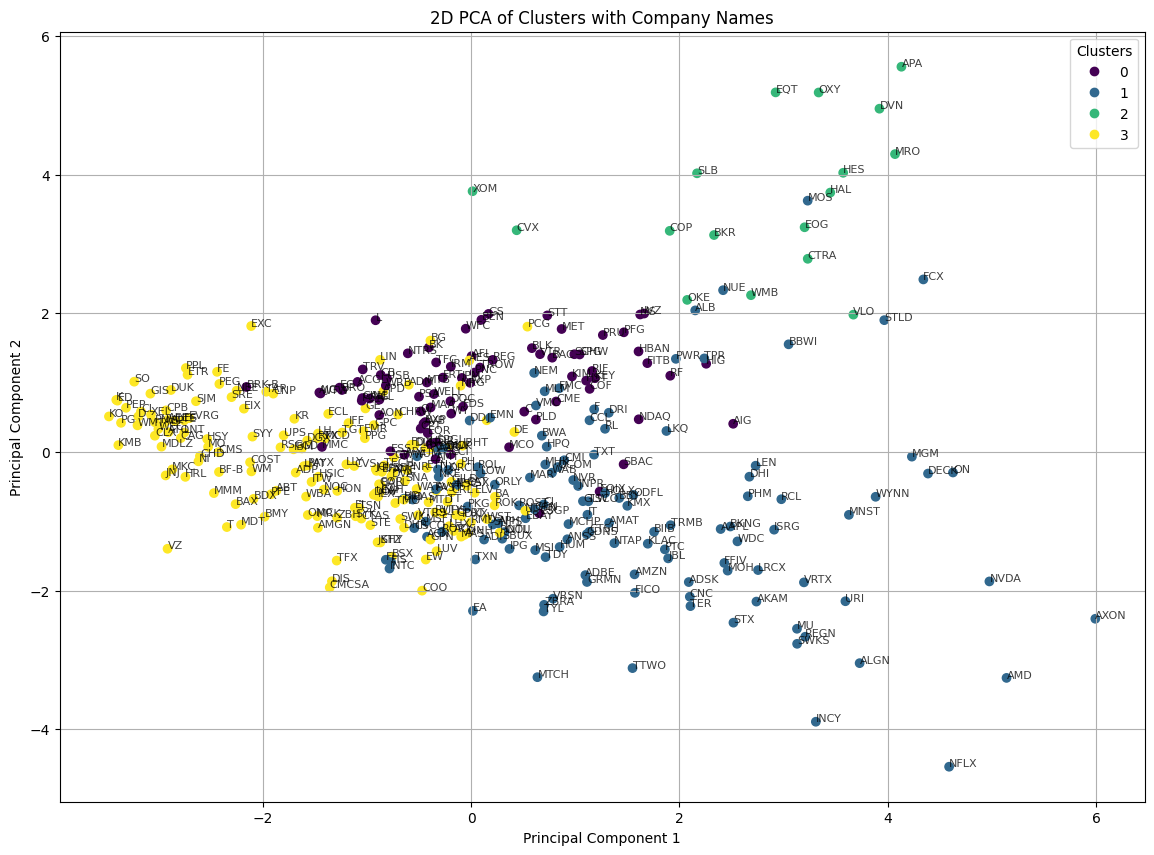

In [323]:
pca = PCA(n_components=2)
components_2d = pca.fit_transform(scaled_features)

plt.figure(figsize=(14, 10))
scatter = plt.scatter(components_2d[:, 0], components_2d[:, 1], c=clusters, cmap='viridis')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('2D PCA of Clusters with Company Names')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

for i, txt in enumerate(merged_data['Company']):
    plt.annotate(txt, (components_2d[i, 0], components_2d[i, 1]), fontsize=8, alpha=0.75)

plt.show()

In [324]:
# Calculate the dispersion of each sector across clusters
sector_cluster_distribution = merged_data.groupby(['GICS Sector', 'Cluster']).size().unstack(fill_value=0)
sector_cluster_percentage = sector_cluster_distribution.div(sector_cluster_distribution.sum(axis=1), axis=0) * 100
sector_cluster_percentage

Cluster                     0          1      2           3
GICS Sector                                                
Basic Materials           0.0  70.588235    0.0   29.411765
Communication Services    0.0  50.000000    0.0   50.000000
Consumer Cyclical         0.0  92.682927    0.0    7.317073
Consumer Defensive        0.0   3.225806    0.0   96.774194
Energy                    0.0   0.000000  100.0    0.000000
Financial Services      100.0   0.000000    0.0    0.000000
Healthcare                0.0  20.370370    0.0   79.629630
Industrials               0.0  12.280702    0.0   87.719298
Real Estate             100.0   0.000000    0.0    0.000000
Technology                0.0  96.153846    0.0    3.846154
Utilities                 0.0   0.000000    0.0  100.000000

<Figure size 1400x1000 with 0 Axes>

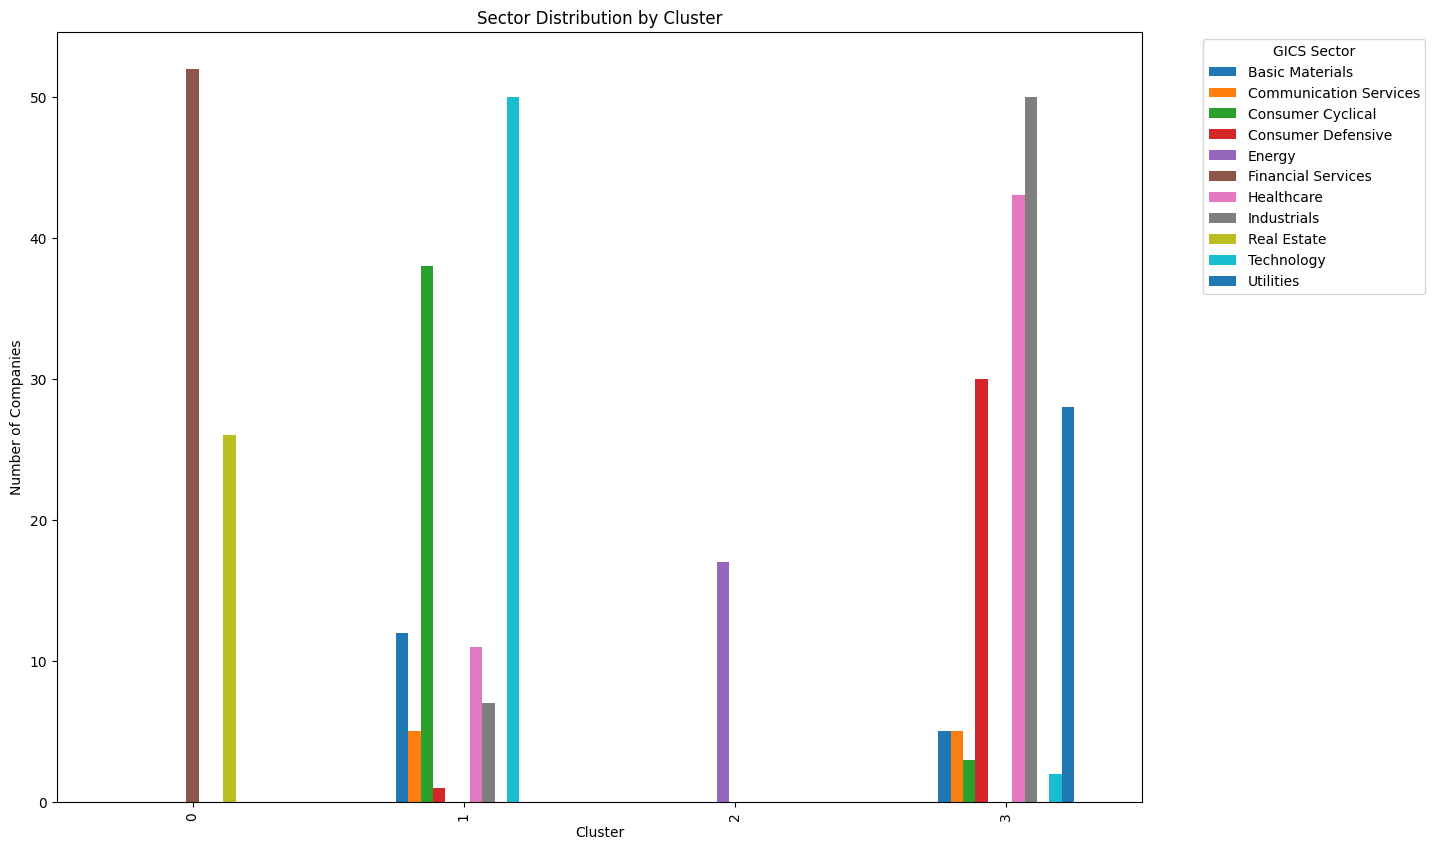

In [325]:
sector_cluster_distribution_transposed = sector_cluster_distribution.T

plt.figure(figsize=(14, 10))
sector_cluster_distribution_transposed.plot(kind='bar', stacked=False, figsize=(14, 10))
plt.title('Sector Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Companies')
plt.legend(title='GICS Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Can we do something about the presence of multiple sectors within clusters and the dispersion of sectors across clusters?  
##### Additional feature engineering??, diff clustering algorithms or increase number of clusters
##### Analyse why few companies are separated from the bigger groups(time series analysis, market cap, startup??) and also check why companies from different sectors are grouped together
